In [1]:
import pandas as pd
from rctgan import Metadata
from rctgan.relational import RCTGAN
import pickle

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/growth_hack_gan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/growth_hack_gan_venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load your datasets
account_details = pd.read_csv('../../Datasets/growth_hack/account_details_data.csv')
account_details

,data_pull_date,card_number,account_type,block_code,credit_limit,product_id,bill_cycle_end_date,payment_due_date,account_open_date,account_number,avg_spend,credit_utilised
0,2025-02-18,9966803425076400,business,C,1000000,B99,2025-01-06,2025-02-01,2020-06-28,760966202538,247970,9
1,2025-02-18,1100554786351499,corporate,C,500000,C11,2025-01-17,2025-02-11,2015-03-08,442223375118,77923,31
2,2025-02-18,9966729746061566,business,C,1000000,B99,2024-12-03,2024-12-31,2020-03-30,520880739063,280250,88
3,2025-02-18,4433655859722491,rewards,A,50000,R44,2024-12-21,2025-01-21,2016-12-28,100316665182,19562,33
4,2025-02-18,5586540046045994,standard,C,100000,S55,2025-01-02,2025-01-27,2015-02-01,897020171190,19899,64
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-02-18,9966442350109599,business,B,3000000,B99,2024-11-25,2025-01-02,2018-02-01,495459376380,1471045,3
96,2025-02-18,5586583721501092,standard,D,1000000,S55,2025-01-11,2025-02-10,2022-02-26,889516171868,69673,41
97,2025-02-18,1100775441405775,corporate,D,50000,C11,2025-01-16,2025-02-22,2022-10-27,403150158040,16312,47
98,2025-02-18,1100525215472235,corporate,A,250000,C11,2025-01-03,2025-02-03,2021-04-03,637095673572,46209,86


In [3]:
account_fin_info = pd.read_csv('../../Datasets/growth_hack/account_fin_info_data.csv')
account_fin_info

,data_pull_date,card_number,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days
0,2025-02-18,9966803425076400,627218,639762,652306,664851,677395,689939,702484,721300
1,2025-02-18,1100554786351499,127593,130144,132696,135248,137800,140352,142904,146731
2,2025-02-18,9966729746061566,331726,338360,344995,351629,358264,364898,371533,381484
3,2025-02-18,4433655859722491,32102,32744,33386,34028,34670,35312,35954,36917
4,2025-02-18,5586540046045994,92405,94253,96101,97949,99797,101645,103493,106265
...,...,...,...,...,...,...,...,...,...,...
95,2025-02-18,9966442350109599,1647301,1680247,1713193,1746139,1779085,1812031,1844977,1894396
96,2025-02-18,5586583721501092,927975,946534,965094,983653,1002213,1020772,1039332,1067171
97,2025-02-18,1100775441405775,18014,18374,18734,19094,19455,19815,20175,20716
98,2025-02-18,1100525215472235,41090,41911,42733,43555,44377,45199,46020,47253


# Preprocess data

## Convert dates to numeric form

In [4]:
def convert_dates_to_days(df, date_columns):
    df['data_pull_date'] = pd.to_datetime(df['data_pull_date'])
    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
        df[f'{col}_days_diff'] = (df[col] - df['data_pull_date']).dt.days
    return df

In [5]:
date_cols_to_be_converted_to_num = ['bill_cycle_end_date', 'payment_due_date', 'account_open_date']
account_details = convert_dates_to_days(account_details, date_cols_to_be_converted_to_num)
account_details

,data_pull_date,card_number,account_type,block_code,credit_limit,product_id,bill_cycle_end_date,payment_due_date,account_open_date,account_number,avg_spend,credit_utilised,bill_cycle_end_date_days_diff,payment_due_date_days_diff,account_open_date_days_diff
0,2025-02-18,9966803425076400,business,C,1000000,B99,2025-01-06,2025-02-01,2020-06-28,760966202538,247970,9,-43,-17,-1696
1,2025-02-18,1100554786351499,corporate,C,500000,C11,2025-01-17,2025-02-11,2015-03-08,442223375118,77923,31,-32,-7,-3635
2,2025-02-18,9966729746061566,business,C,1000000,B99,2024-12-03,2024-12-31,2020-03-30,520880739063,280250,88,-77,-49,-1786
3,2025-02-18,4433655859722491,rewards,A,50000,R44,2024-12-21,2025-01-21,2016-12-28,100316665182,19562,33,-59,-28,-2974
4,2025-02-18,5586540046045994,standard,C,100000,S55,2025-01-02,2025-01-27,2015-02-01,897020171190,19899,64,-47,-22,-3670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-02-18,9966442350109599,business,B,3000000,B99,2024-11-25,2025-01-02,2018-02-01,495459376380,1471045,3,-85,-47,-2574
96,2025-02-18,5586583721501092,standard,D,1000000,S55,2025-01-11,2025-02-10,2022-02-26,889516171868,69673,41,-38,-8,-1088
97,2025-02-18,1100775441405775,corporate,D,50000,C11,2025-01-16,2025-02-22,2022-10-27,403150158040,16312,47,-33,4,-845
98,2025-02-18,1100525215472235,corporate,A,250000,C11,2025-01-03,2025-02-03,2021-04-03,637095673572,46209,86,-46,-15,-1417


In [6]:
account_details.drop(date_cols_to_be_converted_to_num, 
                     axis=1, 
                     inplace=True)

In [7]:
data_pull_date = account_fin_info['data_pull_date'].to_list()

In [8]:
account_details.drop('data_pull_date', axis=1, inplace=True)
account_fin_info.drop('data_pull_date', axis=1, inplace=True)

In [9]:
account_details.shape, account_fin_info.shape

((100, 11), (100, 9))

## Creating the tables dict

In [10]:
account_details

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,bill_cycle_end_date_days_diff,payment_due_date_days_diff,account_open_date_days_diff
0,9966803425076400,business,C,1000000,B99,760966202538,247970,9,-43,-17,-1696
1,1100554786351499,corporate,C,500000,C11,442223375118,77923,31,-32,-7,-3635
2,9966729746061566,business,C,1000000,B99,520880739063,280250,88,-77,-49,-1786
3,4433655859722491,rewards,A,50000,R44,100316665182,19562,33,-59,-28,-2974
4,5586540046045994,standard,C,100000,S55,897020171190,19899,64,-47,-22,-3670
...,...,...,...,...,...,...,...,...,...,...,...
95,9966442350109599,business,B,3000000,B99,495459376380,1471045,3,-85,-47,-2574
96,5586583721501092,standard,D,1000000,S55,889516171868,69673,41,-38,-8,-1088
97,1100775441405775,corporate,D,50000,C11,403150158040,16312,47,-33,4,-845
98,1100525215472235,corporate,A,250000,C11,637095673572,46209,86,-46,-15,-1417


In [11]:
account_fin_info

,card_number,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days
0,9966803425076400,627218,639762,652306,664851,677395,689939,702484,721300
1,1100554786351499,127593,130144,132696,135248,137800,140352,142904,146731
2,9966729746061566,331726,338360,344995,351629,358264,364898,371533,381484
3,4433655859722491,32102,32744,33386,34028,34670,35312,35954,36917
4,5586540046045994,92405,94253,96101,97949,99797,101645,103493,106265
...,...,...,...,...,...,...,...,...,...
95,9966442350109599,1647301,1680247,1713193,1746139,1779085,1812031,1844977,1894396
96,5586583721501092,927975,946534,965094,983653,1002213,1020772,1039332,1067171
97,1100775441405775,18014,18374,18734,19094,19455,19815,20175,20716
98,1100525215472235,41090,41911,42733,43555,44377,45199,46020,47253


In [12]:
tables = {
    "account_details": account_details,
    "account_fin_info": account_fin_info,
}

## Creating metadata

In [13]:
account_details

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,bill_cycle_end_date_days_diff,payment_due_date_days_diff,account_open_date_days_diff
0,9966803425076400,business,C,1000000,B99,760966202538,247970,9,-43,-17,-1696
1,1100554786351499,corporate,C,500000,C11,442223375118,77923,31,-32,-7,-3635
2,9966729746061566,business,C,1000000,B99,520880739063,280250,88,-77,-49,-1786
3,4433655859722491,rewards,A,50000,R44,100316665182,19562,33,-59,-28,-2974
4,5586540046045994,standard,C,100000,S55,897020171190,19899,64,-47,-22,-3670
...,...,...,...,...,...,...,...,...,...,...,...
95,9966442350109599,business,B,3000000,B99,495459376380,1471045,3,-85,-47,-2574
96,5586583721501092,standard,D,1000000,S55,889516171868,69673,41,-38,-8,-1088
97,1100775441405775,corporate,D,50000,C11,403150158040,16312,47,-33,4,-845
98,1100525215472235,corporate,A,250000,C11,637095673572,46209,86,-46,-15,-1417


In [14]:
account_fin_info

,card_number,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days
0,9966803425076400,627218,639762,652306,664851,677395,689939,702484,721300
1,1100554786351499,127593,130144,132696,135248,137800,140352,142904,146731
2,9966729746061566,331726,338360,344995,351629,358264,364898,371533,381484
3,4433655859722491,32102,32744,33386,34028,34670,35312,35954,36917
4,5586540046045994,92405,94253,96101,97949,99797,101645,103493,106265
...,...,...,...,...,...,...,...,...,...
95,9966442350109599,1647301,1680247,1713193,1746139,1779085,1812031,1844977,1894396
96,5586583721501092,927975,946534,965094,983653,1002213,1020772,1039332,1067171
97,1100775441405775,18014,18374,18734,19094,19455,19815,20175,20716
98,1100525215472235,41090,41911,42733,43555,44377,45199,46020,47253


In [15]:
# Initialize Metadata instance
metadata = Metadata()


# Define field properties for each table
account_details_fields = {
    "card_number": {"type": "id", "subtype": "integer"},
    "account_type": {"type": "categorical"},
    "block_code": {"type": "categorical"},
    "credit_limit": {"type": "numerical", "subtype": "integer"},
    "product_id": {"type": "categorical"},
    "account_number": {"type": "numerical", "subtype": "integer"},
    "avg_spend": {"type": "numerical", "subtype": "float"},
    "credit_utilised": {"type": "numerical", "subtype": "integer"},
    "bill_cycle_end_date_days_diff": {"type": "numerical", "subtype": "integer"},
    "payment_due_date_days_diff": {"type": "numerical", "subtype": "integer"},
    "account_open_date_days_diff": {"type": "numerical", "subtype": "integer"},
}

account_fin_info_fields = {
    "card_number": {"type": "numerical", "subtype": "integer"},
    "amount_due": {"type": "numerical", "subtype": "float"},
    "due_in_30_days": {"type": "numerical", "subtype": "float"},
    "due_in_60_days": {"type": "numerical", "subtype": "float"},
    "due_in_90_days": {"type": "numerical", "subtype": "float"},
    "due_in_120_days": {"type": "numerical", "subtype": "float"},
    "due_in_150_days": {"type": "numerical", "subtype": "float"},
    "due_in_180_days": {"type": "numerical", "subtype": "float"},
    "due_in_210_days": {"type": "numerical", "subtype": "float"},
}


# Add tables with primary keys
metadata.add_table(
    name="account_details",
    data=tables["account_details"],
    primary_key="card_number",
    fields_metadata=account_details_fields
)

metadata.add_table(
    name="account_fin_info",
    data=tables["account_fin_info"],
    fields_metadata=account_fin_info_fields
)

# Add relationships (Foreign Key mappings)
metadata.add_relationship(parent="account_details", child="account_fin_info", foreign_key="card_number")

# Print metadata to verify
import json
print(json.dumps(metadata.to_dict(), indent=4))

{
    "tables": {
        "account_details": {
            "fields": {
                "card_number": {
                    "type": "id",
                    "subtype": "integer"
                },
                "account_type": {
                    "type": "categorical"
                },
                "block_code": {
                    "type": "categorical"
                },
                "credit_limit": {
                    "type": "numerical",
                    "subtype": "integer"
                },
                "product_id": {
                    "type": "categorical"
                },
                "account_number": {
                    "type": "numerical",
                    "subtype": "integer"
                },
                "avg_spend": {
                    "type": "numerical",
                    "subtype": "float"
                },
                "credit_utilised": {
                    "type": "numerical",
                    "subtype": "integer"


# Model Training

## Training the model

In [191]:
model = RCTGAN(metadata)
model.fit(tables)

100%|██████████| 1000/1000 [00:34<00:00, 28.60it/s]


## Saving the model

In [192]:
pickle.dump(model, open('../../Models/growth_hack/model_rctgan.p', "wb" ) )

## Loading the model

In [224]:
model = pickle.load(open('../../Models/growth_hack/model_rctgan.p', "rb" ) )

# Model Fine Tuning

## Tuning the model

In [16]:
# hyper = {
#     'customers_info': {
#         'embedding_dim': 64,
#         'generator_lr': 2e-5,
#         'generator_dim': (256, 256)
#     },
#     'transactions': {
#         'embedding_dim': 12,
#         'generator_lr': 2e-4,
#         'generator_dim': (128, 128),
#         'batch_size': 10000
#     },
#     'credit_cards': {
#         'embedding_dim': 12,
#         'generator_lr': 2e-4,
#         'generator_dim': (64, 64),
#         'batch_size': 10000,
#         'grand_parent': True
#     },
#     'customer_demographics': {
#         'embedding_dim': 16,
#         'generator_lr': 3e-4,
#         'generator_dim': (128, 128),
#         'batch_size': 8000
#     }
# }

# # Initialize and train the RCTGAN model
# model = RCTGAN(metadata, hyper)
# model.fit(tables)


hyper = {
    'account_details': {
        'embedding_dim': 32,  # Moderate embedding for mixed categorical and numerical data
        'generator_lr': 2e-4,  # Higher LR to capture diverse patterns
        'generator_dim': (256, 256),  # Deeper layers for complex structure
        'batch_size': 10000,  # Larger batch size for performance on large tables
        'data_processors': [{
            'field': 'card_number',
            'processor': 'regex_generator',
            'pattern': '\\d{13}'  # Ensures 13-digit card numbers
        }]
    },
    'account_fin_info': {
        'embedding_dim': 16,  # Lower embedding due to fewer categorical fields
        'generator_lr': 3e-4,  # Faster learning rate for better convergence on numerical-heavy data
        'generator_dim': (128, 128),  # Moderate layers for numeric-dominant table
        'batch_size': 8000,  # Slightly smaller batch size to balance memory usage
        'grand_parent': True,  # Enable relation handling due to foreign key reference
        'data_processors': [{
            'field': 'card_number',
            'processor': 'regex_generator',
            'pattern': '\\d{13}'  # Ensures 13-digit card numbers
        }]
    }
}

# Initialize and train the RCTGAN model
model = RCTGAN(metadata, hyper)
model.fit(tables)


100%|██████████| 1000/1000 [02:27<00:00,  6.78it/s]


## Saving the Tuned Model

In [195]:
# pickle.dump(model, open('../Models/model_rctgan_tuned.p', "wb" ) )

## Loading the Tuned Model

In [196]:
# model = pickle.load(open("../Models/model_rctgan_tuned.p", "rb" ) )

# Generating the samples

In [17]:
synthetic_data = model.sample()

AttributeError: 'DataFrame' object has no attribute 'append'

In [198]:
account_details

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,bill_cycle_end_date_days_diff,payment_due_date_days_diff,account_open_date_days_diff
0,9966803425076400,business,C,1000000,B99,760966202538,247970,9,-43,-17,-1696
1,1100554786351499,corporate,C,500000,C11,442223375118,77923,31,-32,-7,-3635
2,9966729746061566,business,C,1000000,B99,520880739063,280250,88,-77,-49,-1786
3,4433655859722491,rewards,A,50000,R44,100316665182,19562,33,-59,-28,-2974
4,5586540046045994,standard,C,100000,S55,897020171190,19899,64,-47,-22,-3670
...,...,...,...,...,...,...,...,...,...,...,...
95,9966442350109599,business,B,3000000,B99,495459376380,1471045,3,-85,-47,-2574
96,5586583721501092,standard,D,1000000,S55,889516171868,69673,41,-38,-8,-1088
97,1100775441405775,corporate,D,50000,C11,403150158040,16312,47,-33,4,-845
98,1100525215472235,corporate,A,250000,C11,637095673572,46209,86,-46,-15,-1417


In [199]:
account_details_syn = synthetic_data['account_details']
account_details_syn

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,bill_cycle_end_date_days_diff,payment_due_date_days_diff,account_open_date_days_diff
0,0,rewards,D,740000,R44,237989922346,1471045,28,-46,4,-3198
1,1,rewards,D,240000,C11,75742255758,71745,20,-55,-37,-3692
2,2,business,B,120000,B99,390595851810,267904,43,-88,-61,-2757
3,3,business,B,870000,B99,810070997907,394035,63,-79,-63,-1754
4,4,corporate,A,1070000,C11,18759623424,1471045,1,-59,-11,-3215
...,...,...,...,...,...,...,...,...,...,...,...
95,95,rewards,D,90000,R44,189411044915,185454,50,-84,-6,-3216
96,96,rewards,C,420000,C11,449169582732,10139,76,-87,-4,-2417
97,97,standard,B,980000,S55,206308826957,1471045,17,-66,-8,-3462
98,98,rewards,D,2610000,R44,852219702908,1471045,4,-54,-55,-3692


In [200]:
account_fin_info

,card_number,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days
0,9966803425076400,627218,639762,652306,664851,677395,689939,702484,721300
1,1100554786351499,127593,130144,132696,135248,137800,140352,142904,146731
2,9966729746061566,331726,338360,344995,351629,358264,364898,371533,381484
3,4433655859722491,32102,32744,33386,34028,34670,35312,35954,36917
4,5586540046045994,92405,94253,96101,97949,99797,101645,103493,106265
...,...,...,...,...,...,...,...,...,...
95,9966442350109599,1647301,1680247,1713193,1746139,1779085,1812031,1844977,1894396
96,5586583721501092,927975,946534,965094,983653,1002213,1020772,1039332,1067171
97,1100775441405775,18014,18374,18734,19094,19455,19815,20175,20716
98,1100525215472235,41090,41911,42733,43555,44377,45199,46020,47253


In [201]:
account_fin_info_syn = synthetic_data['account_fin_info']
account_fin_info_syn

,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days,card_number
0,536689,580883,919007,939819,659113,658877,696428,1123042,0
1,56594,30379,138644,73026,64151,15816,49889,16535,1
2,175820,14666,204286,177029,69987,68298,16104,56094,2
3,139089,14666,269044,221722,120687,75951,161460,19159,3
4,459774,792184,992166,1159526,499223,923930,796534,603135,4
...,...,...,...,...,...,...,...,...,...
95,65519,14666,130330,118996,135874,127850,64113,16535,95
96,14379,14666,36595,54693,15529,15816,64333,16535,96
97,814288,586046,597060,882605,850221,670414,809217,2227196,97
98,532523,245914,1030170,985773,697550,977364,2258611,783768,98


# Assigning the dates

In [202]:
details_date_diff_map = {
    'bill_cycle_end_date': 'bill_cycle_end_date_days_diff',
    'payment_due_date': 'payment_due_date_days_diff',
    'account_open_date': 'account_open_date_days_diff'
}

In [203]:
account_details['data_pull_date'] = data_pull_date
account_fin_info['data_pull_date'] = data_pull_date


account_details_syn['data_pull_date'] = data_pull_date
account_fin_info_syn['data_pull_date'] = data_pull_date

In [204]:
def reassign_dates(df, date_diff_columns):
    df['data_pull_date'] = pd.to_datetime(df['data_pull_date'])
    for col, diff_col in date_diff_columns.items():
        df[col] = df['data_pull_date'] + pd.to_timedelta(df[diff_col], unit='D')
    return df

In [205]:
account_details = reassign_dates(account_details, details_date_diff_map)
account_details_syn = reassign_dates(account_details_syn, details_date_diff_map)

In [206]:
account_details

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,bill_cycle_end_date_days_diff,payment_due_date_days_diff,account_open_date_days_diff,data_pull_date,bill_cycle_end_date,payment_due_date,account_open_date
0,9966803425076400,business,C,1000000,B99,760966202538,247970,9,-43,-17,-1696,2025-02-18,2025-01-06,2025-02-01,2020-06-28
1,1100554786351499,corporate,C,500000,C11,442223375118,77923,31,-32,-7,-3635,2025-02-18,2025-01-17,2025-02-11,2015-03-08
2,9966729746061566,business,C,1000000,B99,520880739063,280250,88,-77,-49,-1786,2025-02-18,2024-12-03,2024-12-31,2020-03-30
3,4433655859722491,rewards,A,50000,R44,100316665182,19562,33,-59,-28,-2974,2025-02-18,2024-12-21,2025-01-21,2016-12-28
4,5586540046045994,standard,C,100000,S55,897020171190,19899,64,-47,-22,-3670,2025-02-18,2025-01-02,2025-01-27,2015-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9966442350109599,business,B,3000000,B99,495459376380,1471045,3,-85,-47,-2574,2025-02-18,2024-11-25,2025-01-02,2018-02-01
96,5586583721501092,standard,D,1000000,S55,889516171868,69673,41,-38,-8,-1088,2025-02-18,2025-01-11,2025-02-10,2022-02-26
97,1100775441405775,corporate,D,50000,C11,403150158040,16312,47,-33,4,-845,2025-02-18,2025-01-16,2025-02-22,2022-10-27
98,1100525215472235,corporate,A,250000,C11,637095673572,46209,86,-46,-15,-1417,2025-02-18,2025-01-03,2025-02-03,2021-04-03


In [207]:
account_details_syn

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,bill_cycle_end_date_days_diff,payment_due_date_days_diff,account_open_date_days_diff,data_pull_date,bill_cycle_end_date,payment_due_date,account_open_date
0,0,rewards,D,740000,R44,237989922346,1471045,28,-46,4,-3198,2025-02-18,2025-01-03,2025-02-22,2016-05-18
1,1,rewards,D,240000,C11,75742255758,71745,20,-55,-37,-3692,2025-02-18,2024-12-25,2025-01-12,2015-01-10
2,2,business,B,120000,B99,390595851810,267904,43,-88,-61,-2757,2025-02-18,2024-11-22,2024-12-19,2017-08-02
3,3,business,B,870000,B99,810070997907,394035,63,-79,-63,-1754,2025-02-18,2024-12-01,2024-12-17,2020-05-01
4,4,corporate,A,1070000,C11,18759623424,1471045,1,-59,-11,-3215,2025-02-18,2024-12-21,2025-02-07,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,rewards,D,90000,R44,189411044915,185454,50,-84,-6,-3216,2025-02-18,2024-11-26,2025-02-12,2016-04-30
96,96,rewards,C,420000,C11,449169582732,10139,76,-87,-4,-2417,2025-02-18,2024-11-23,2025-02-14,2018-07-08
97,97,standard,B,980000,S55,206308826957,1471045,17,-66,-8,-3462,2025-02-18,2024-12-14,2025-02-10,2015-08-28
98,98,rewards,D,2610000,R44,852219702908,1471045,4,-54,-55,-3692,2025-02-18,2024-12-26,2024-12-25,2015-01-10


In [208]:
num_date_cols_to_remove = list({v:k for k,v in details_date_diff_map.items()}.keys())
num_date_cols_to_remove


['bill_cycle_end_date_days_diff',
 'payment_due_date_days_diff',
 'account_open_date_days_diff']

In [209]:
account_details.drop(num_date_cols_to_remove, axis=1, inplace=True)
account_details_syn.drop(num_date_cols_to_remove, axis=1, inplace=True)

In [210]:
account_details

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,data_pull_date,bill_cycle_end_date,payment_due_date,account_open_date
0,9966803425076400,business,C,1000000,B99,760966202538,247970,9,2025-02-18,2025-01-06,2025-02-01,2020-06-28
1,1100554786351499,corporate,C,500000,C11,442223375118,77923,31,2025-02-18,2025-01-17,2025-02-11,2015-03-08
2,9966729746061566,business,C,1000000,B99,520880739063,280250,88,2025-02-18,2024-12-03,2024-12-31,2020-03-30
3,4433655859722491,rewards,A,50000,R44,100316665182,19562,33,2025-02-18,2024-12-21,2025-01-21,2016-12-28
4,5586540046045994,standard,C,100000,S55,897020171190,19899,64,2025-02-18,2025-01-02,2025-01-27,2015-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...
95,9966442350109599,business,B,3000000,B99,495459376380,1471045,3,2025-02-18,2024-11-25,2025-01-02,2018-02-01
96,5586583721501092,standard,D,1000000,S55,889516171868,69673,41,2025-02-18,2025-01-11,2025-02-10,2022-02-26
97,1100775441405775,corporate,D,50000,C11,403150158040,16312,47,2025-02-18,2025-01-16,2025-02-22,2022-10-27
98,1100525215472235,corporate,A,250000,C11,637095673572,46209,86,2025-02-18,2025-01-03,2025-02-03,2021-04-03


In [211]:
account_details_syn

,card_number,account_type,block_code,credit_limit,product_id,account_number,avg_spend,credit_utilised,data_pull_date,bill_cycle_end_date,payment_due_date,account_open_date
0,0,rewards,D,740000,R44,237989922346,1471045,28,2025-02-18,2025-01-03,2025-02-22,2016-05-18
1,1,rewards,D,240000,C11,75742255758,71745,20,2025-02-18,2024-12-25,2025-01-12,2015-01-10
2,2,business,B,120000,B99,390595851810,267904,43,2025-02-18,2024-11-22,2024-12-19,2017-08-02
3,3,business,B,870000,B99,810070997907,394035,63,2025-02-18,2024-12-01,2024-12-17,2020-05-01
4,4,corporate,A,1070000,C11,18759623424,1471045,1,2025-02-18,2024-12-21,2025-02-07,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,rewards,D,90000,R44,189411044915,185454,50,2025-02-18,2024-11-26,2025-02-12,2016-04-30
96,96,rewards,C,420000,C11,449169582732,10139,76,2025-02-18,2024-11-23,2025-02-14,2018-07-08
97,97,standard,B,980000,S55,206308826957,1471045,17,2025-02-18,2024-12-14,2025-02-10,2015-08-28
98,98,rewards,D,2610000,R44,852219702908,1471045,4,2025-02-18,2024-12-26,2024-12-25,2015-01-10


In [213]:
account_fin_info_syn

,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days,card_number,data_pull_date
0,536689,580883,919007,939819,659113,658877,696428,1123042,0,2025-02-18
1,56594,30379,138644,73026,64151,15816,49889,16535,1,2025-02-18
2,175820,14666,204286,177029,69987,68298,16104,56094,2,2025-02-18
3,139089,14666,269044,221722,120687,75951,161460,19159,3,2025-02-18
4,459774,792184,992166,1159526,499223,923930,796534,603135,4,2025-02-18
...,...,...,...,...,...,...,...,...,...,...
95,65519,14666,130330,118996,135874,127850,64113,16535,95,2025-02-18
96,14379,14666,36595,54693,15529,15816,64333,16535,96,2025-02-18
97,814288,586046,597060,882605,850221,670414,809217,2227196,97,2025-02-18
98,532523,245914,1030170,985773,697550,977364,2258611,783768,98,2025-02-18


In [214]:
synthetic_data['account_details'] = account_details_syn
synthetic_data['account_fin_info'] = account_fin_info_syn

In [215]:
with open("../../Models/growth_hack/synthetic_data_gh.pkl", "wb") as file:
    pickle.dump(synthetic_data, file)

In [216]:
with open("../../Models/growth_hack/synthetic_data_gh.pkl", "rb") as file:
    synthetic_data = pickle.load(file)

In [227]:
account_fin_info_syn.to_csv('account_fin_info_syn.csv',index=False)

# Evaluating data quality

In [1]:
from table_evaluator import TableEvaluator

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/growth_hack_gan_venv/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


IPython not installed.


In [2]:
import pandas as pd

In [6]:
account_details = pd.read_csv('account_details.csv')
account_details

,data_pull_date,card_number,account_type,block_code,credit_limit,product_id,bill_cycle_end_date,payment_due_date,account_open_date,account_number,avg_spend,credit_utilised
0,2025-02-18,9966803425076400,business,C,1000000,B99,2025-01-06,2025-02-01,2020-06-28,760966202538,247970,9
1,2025-02-18,1100554786351499,corporate,C,500000,C11,2025-01-17,2025-02-11,2015-03-08,442223375118,77923,31
2,2025-02-18,9966729746061566,business,C,1000000,B99,2024-12-03,2024-12-31,2020-03-30,520880739063,280250,88
3,2025-02-18,4433655859722491,rewards,A,50000,R44,2024-12-21,2025-01-21,2016-12-28,100316665182,19562,33
4,2025-02-18,5586540046045994,standard,C,100000,S55,2025-01-02,2025-01-27,2015-02-01,897020171190,19899,64
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-02-18,9966442350109599,business,B,3000000,B99,2024-11-25,2025-01-02,2018-02-01,495459376380,1471045,3
96,2025-02-18,5586583721501092,standard,D,1000000,S55,2025-01-11,2025-02-10,2022-02-26,889516171868,69673,41
97,2025-02-18,1100775441405775,corporate,D,50000,C11,2025-01-16,2025-02-22,2022-10-27,403150158040,16312,47
98,2025-02-18,1100525215472235,corporate,A,250000,C11,2025-01-03,2025-02-03,2021-04-03,637095673572,46209,86


In [7]:
account_details_syn = pd.read_csv('account_details_syn.csv')
account_details_syn

,data_pull_date,card_number,account_type,block_code,credit_limit,product_id,bill_cycle_end_date,payment_due_date,account_open_date,account_number,avg_spend,credit_utilised
0,2025-02-18,9966803425076401,rewards,D,740000,R44,2025-01-03,2025-02-22,2016-05-18,237989922346,1471045,28
1,2025-02-18,1100554786351500,rewards,D,240000,C11,2024-12-25,2025-01-12,2015-01-10,75742255758,71745,20
2,2025-02-18,9966729746061567,business,B,120000,B99,2024-11-22,2024-12-19,2017-08-02,390595851810,267904,43
3,2025-02-18,4433655859722492,business,B,870000,B99,2024-12-01,2024-12-17,2020-05-01,810070997907,394035,63
4,2025-02-18,5586540046045995,corporate,A,1070000,C11,2024-12-21,2025-02-07,2016-05-01,18759623424,1471045,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-02-18,9966442350109600,rewards,D,90000,R44,2024-11-26,2025-02-12,2016-04-30,189411044915,185454,50
96,2025-02-18,5586583721501093,rewards,C,420000,C11,2024-11-23,2025-02-14,2018-07-08,449169582732,10139,76
97,2025-02-18,1100775441405776,standard,B,980000,S55,2024-12-14,2025-02-10,2015-08-28,206308826957,1471045,17
98,2025-02-18,1100525215472236,rewards,D,2610000,R44,2024-12-26,2024-12-25,2015-01-10,852219702908,1471045,4


In [10]:
account_fin_info = pd.read_csv('account_fin_info.csv')
account_fin_info

,data_pull_date,card_number,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days
0,2025-02-18,9966803425076400,627218,639762,652306,664851,677395,689939,702484,721300
1,2025-02-18,1100554786351499,127593,130144,132696,135248,137800,140352,142904,146731
2,2025-02-18,9966729746061566,331726,338360,344995,351629,358264,364898,371533,381484
3,2025-02-18,4433655859722491,32102,32744,33386,34028,34670,35312,35954,36917
4,2025-02-18,5586540046045994,92405,94253,96101,97949,99797,101645,103493,106265
...,...,...,...,...,...,...,...,...,...,...
95,2025-02-18,9966442350109599,1647301,1680247,1713193,1746139,1779085,1812031,1844977,1894396
96,2025-02-18,5586583721501092,927975,946534,965094,983653,1002213,1020772,1039332,1067171
97,2025-02-18,1100775441405775,18014,18374,18734,19094,19455,19815,20175,20716
98,2025-02-18,1100525215472235,41090,41911,42733,43555,44377,45199,46020,47253


In [11]:
account_fin_info_syn = pd.read_csv('account_fin_info_syn.csv')
account_fin_info_syn

,data_pull_date,card_number,amount_due,due_in_30_days,due_in_60_days,due_in_90_days,due_in_120_days,due_in_150_days,due_in_180_days,due_in_210_days
0,2025-02-18,9966803425076401,536689,580883,919007,939819,659113,658877,696428,1123042
1,2025-02-18,1100554786351500,56594,30379,138644,73026,64151,15816,49889,16535
2,2025-02-18,9966729746061567,175820,14666,204286,177029,69987,68298,16104,56094
3,2025-02-18,4433655859722492,139089,14666,269044,221722,120687,75951,161460,19159
4,2025-02-18,5586540046045995,459774,792184,992166,1159526,499223,923930,796534,603135
...,...,...,...,...,...,...,...,...,...,...
95,2025-02-18,9966442350109600,65519,14666,130330,118996,135874,127850,64113,16535
96,2025-02-18,5586583721501093,14379,14666,36595,54693,15529,15816,64333,16535
97,2025-02-18,1100775441405776,814288,586046,597060,882605,850221,670414,809217,2227196
98,2025-02-18,1100525215472236,532523,245914,1030170,985773,697550,977364,2258611,783768


In [8]:
# Step 5: Define Evaluation Function
def evaluate_synthetic_data(real_data, synthetic_data, dataset_name="Dataset"):
    print(f"\n--- Evaluating {dataset_name} ---")
    
    # TableEvaluator - Visual Evaluation
    print("\nTableEvaluator Results:")
    evaluator = TableEvaluator(real_data, synthetic_data)
    evaluator.visual_evaluation()
    #evaluator.evaluate(target_col=real_data.columns[1])  # Adjust target column

In [221]:
tables.keys()

dict_keys(['account_details', 'account_fin_info'])


--- Evaluating account_details ---

TableEvaluator Results:


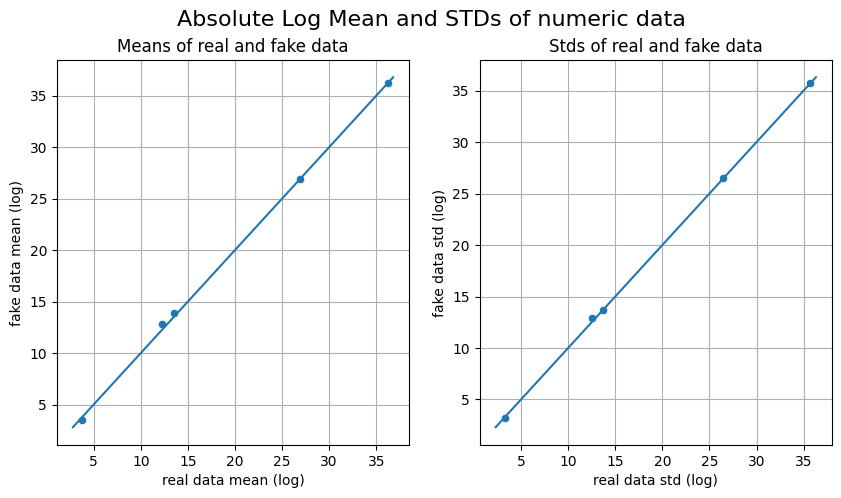

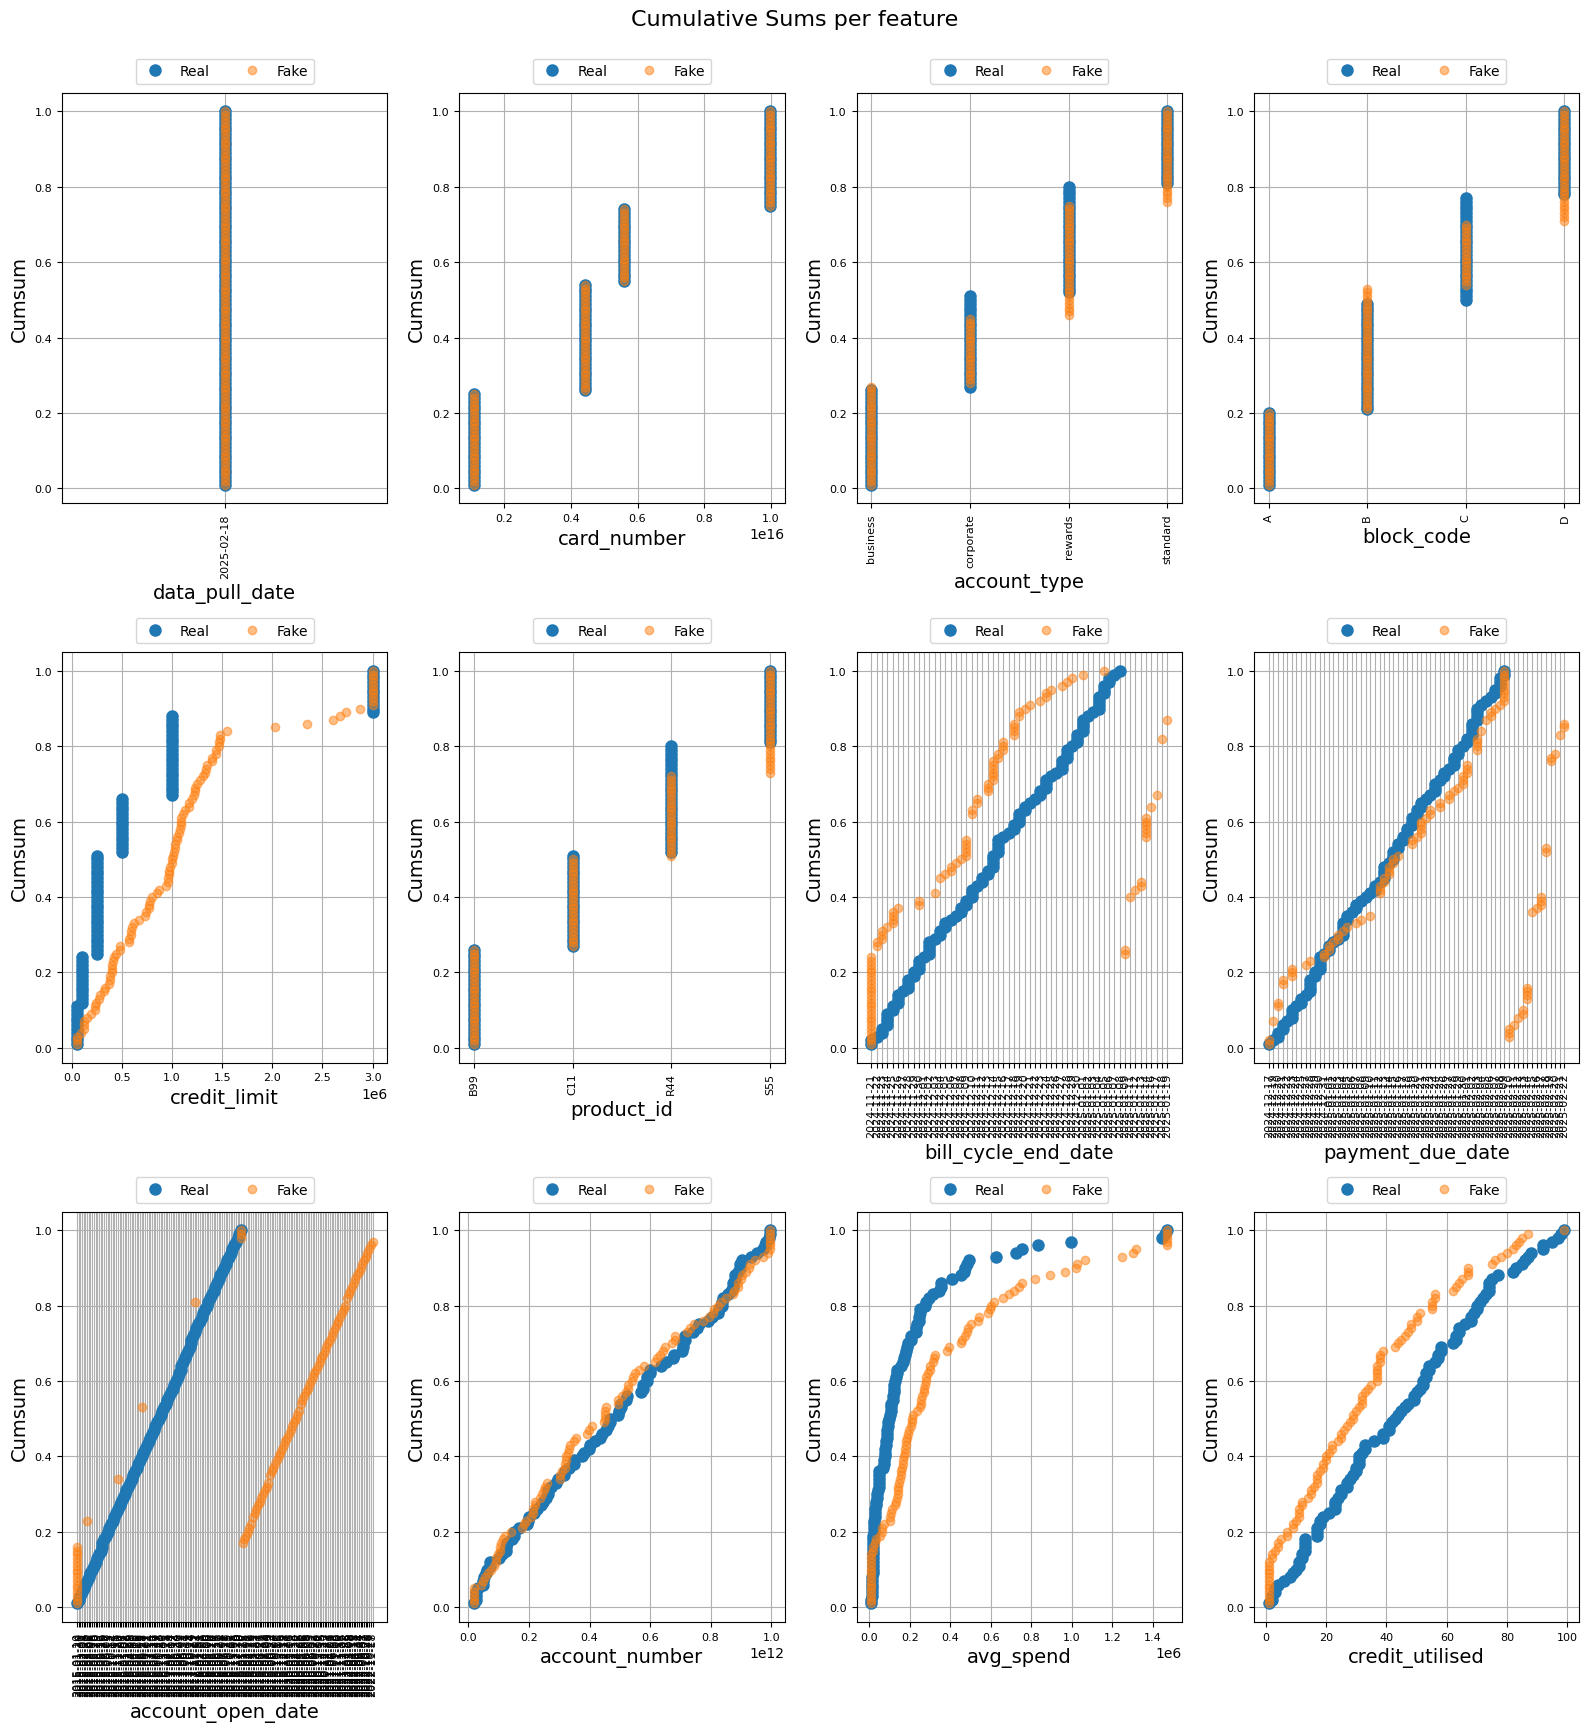

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/growth_hack_gan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/growth_hack_gan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/growth_hack_gan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a 

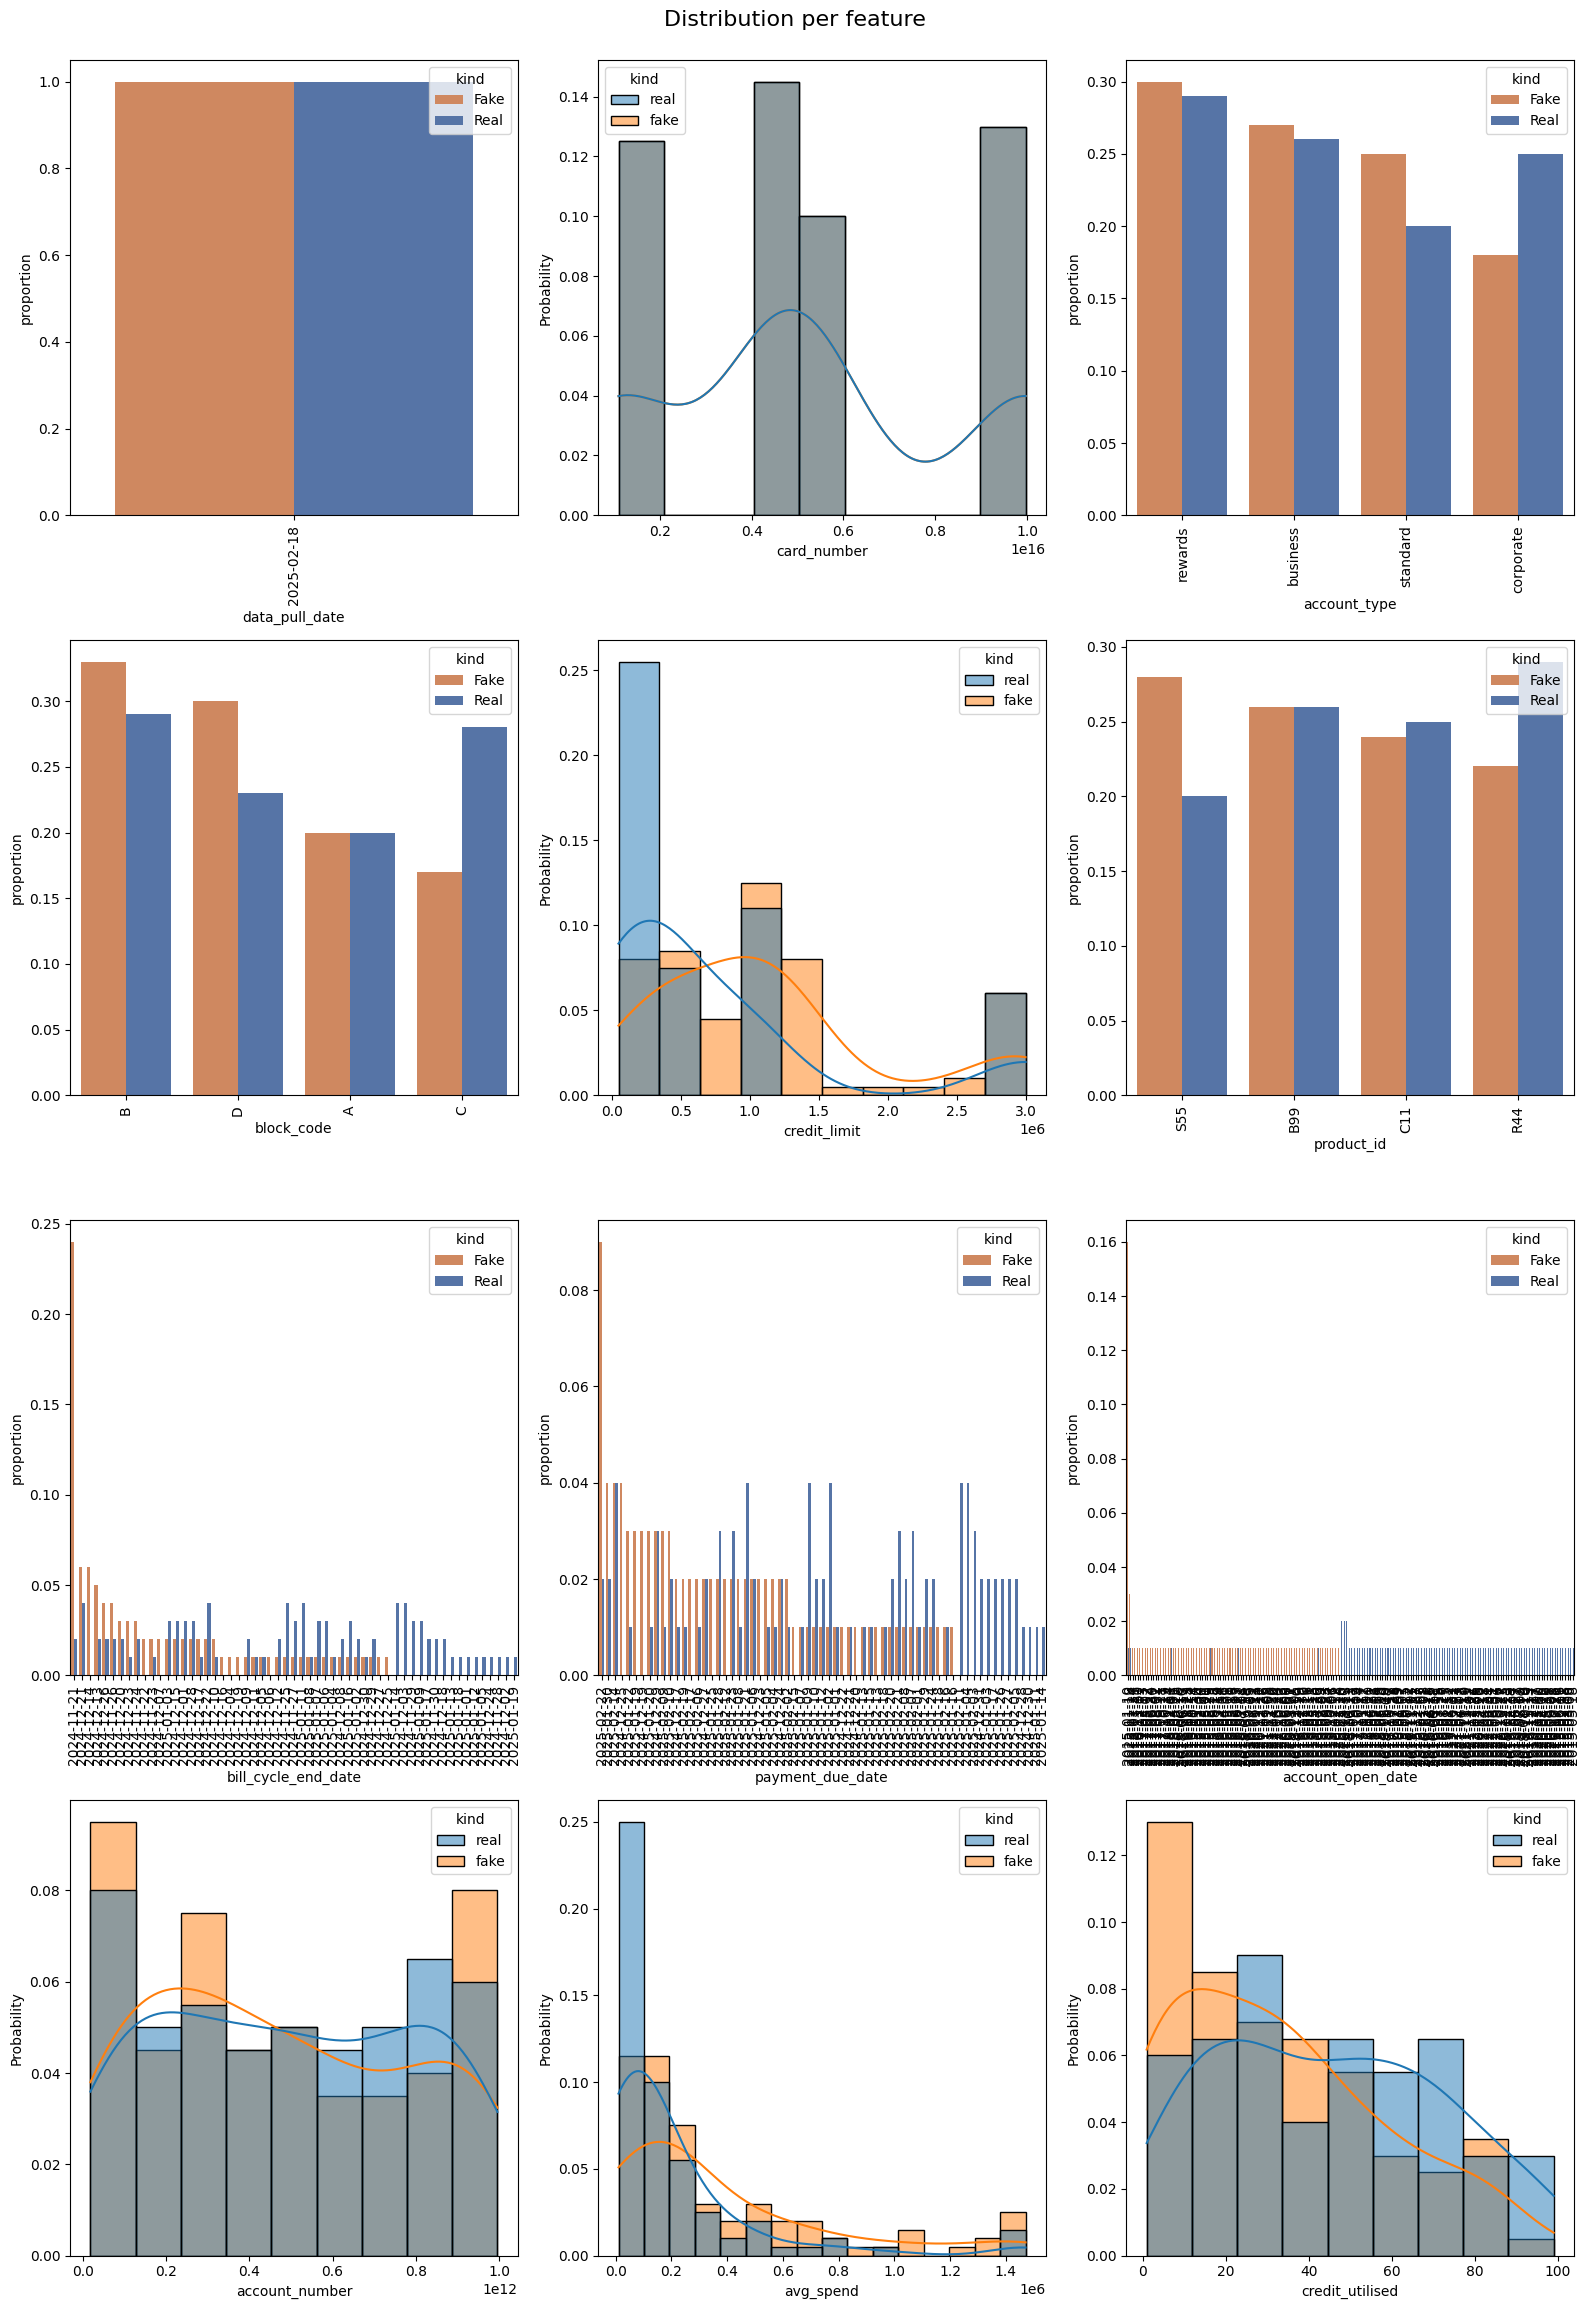

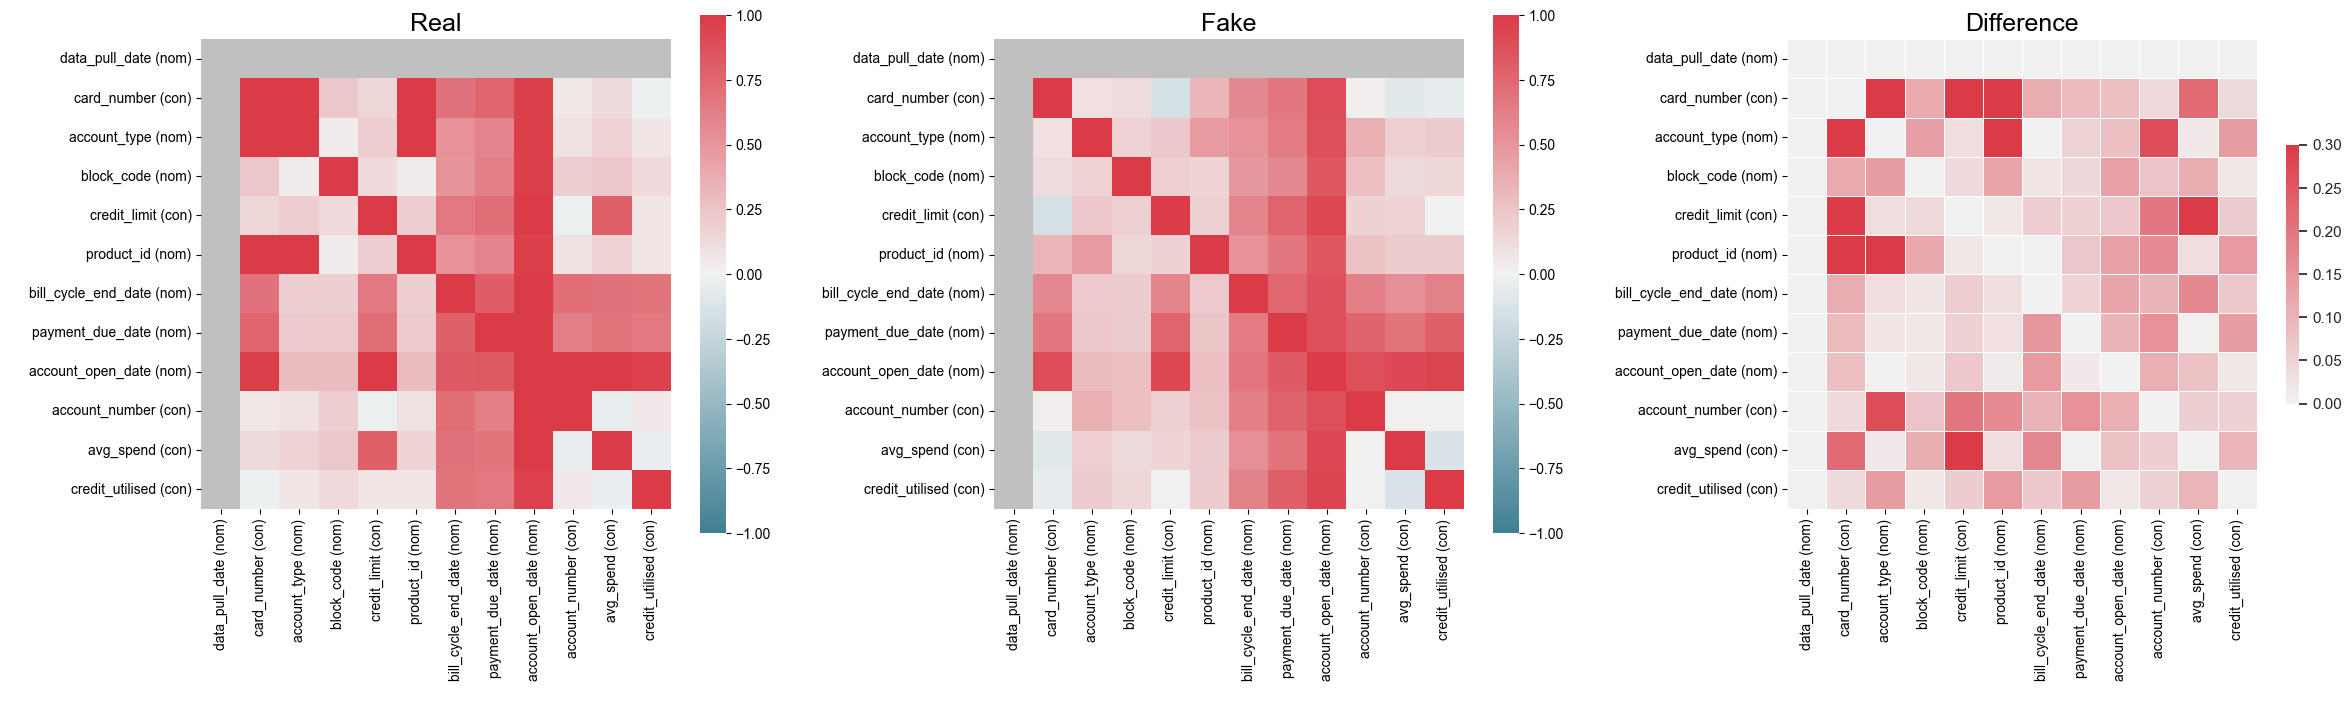

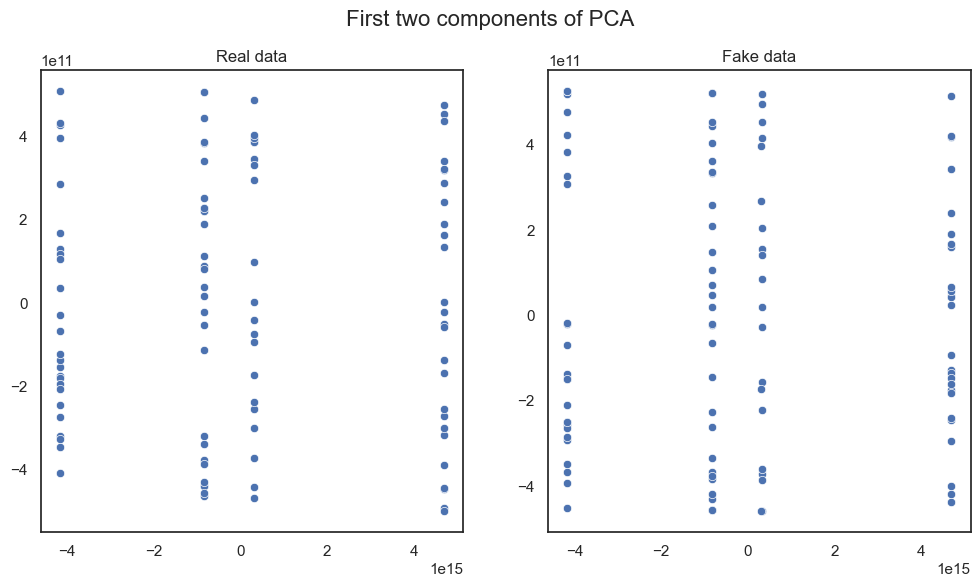

In [9]:
evaluate_synthetic_data(account_details, 
                        account_details_syn, 
                        dataset_name="account_details")


--- Evaluating account fin info ---

TableEvaluator Results:


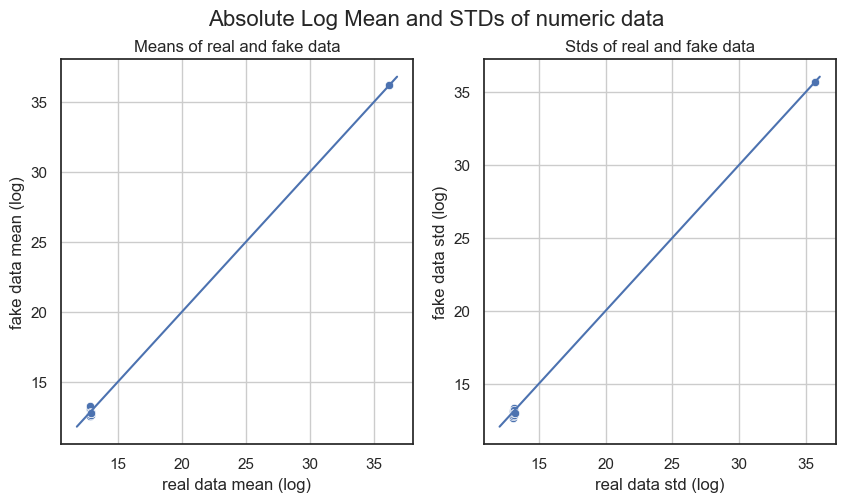

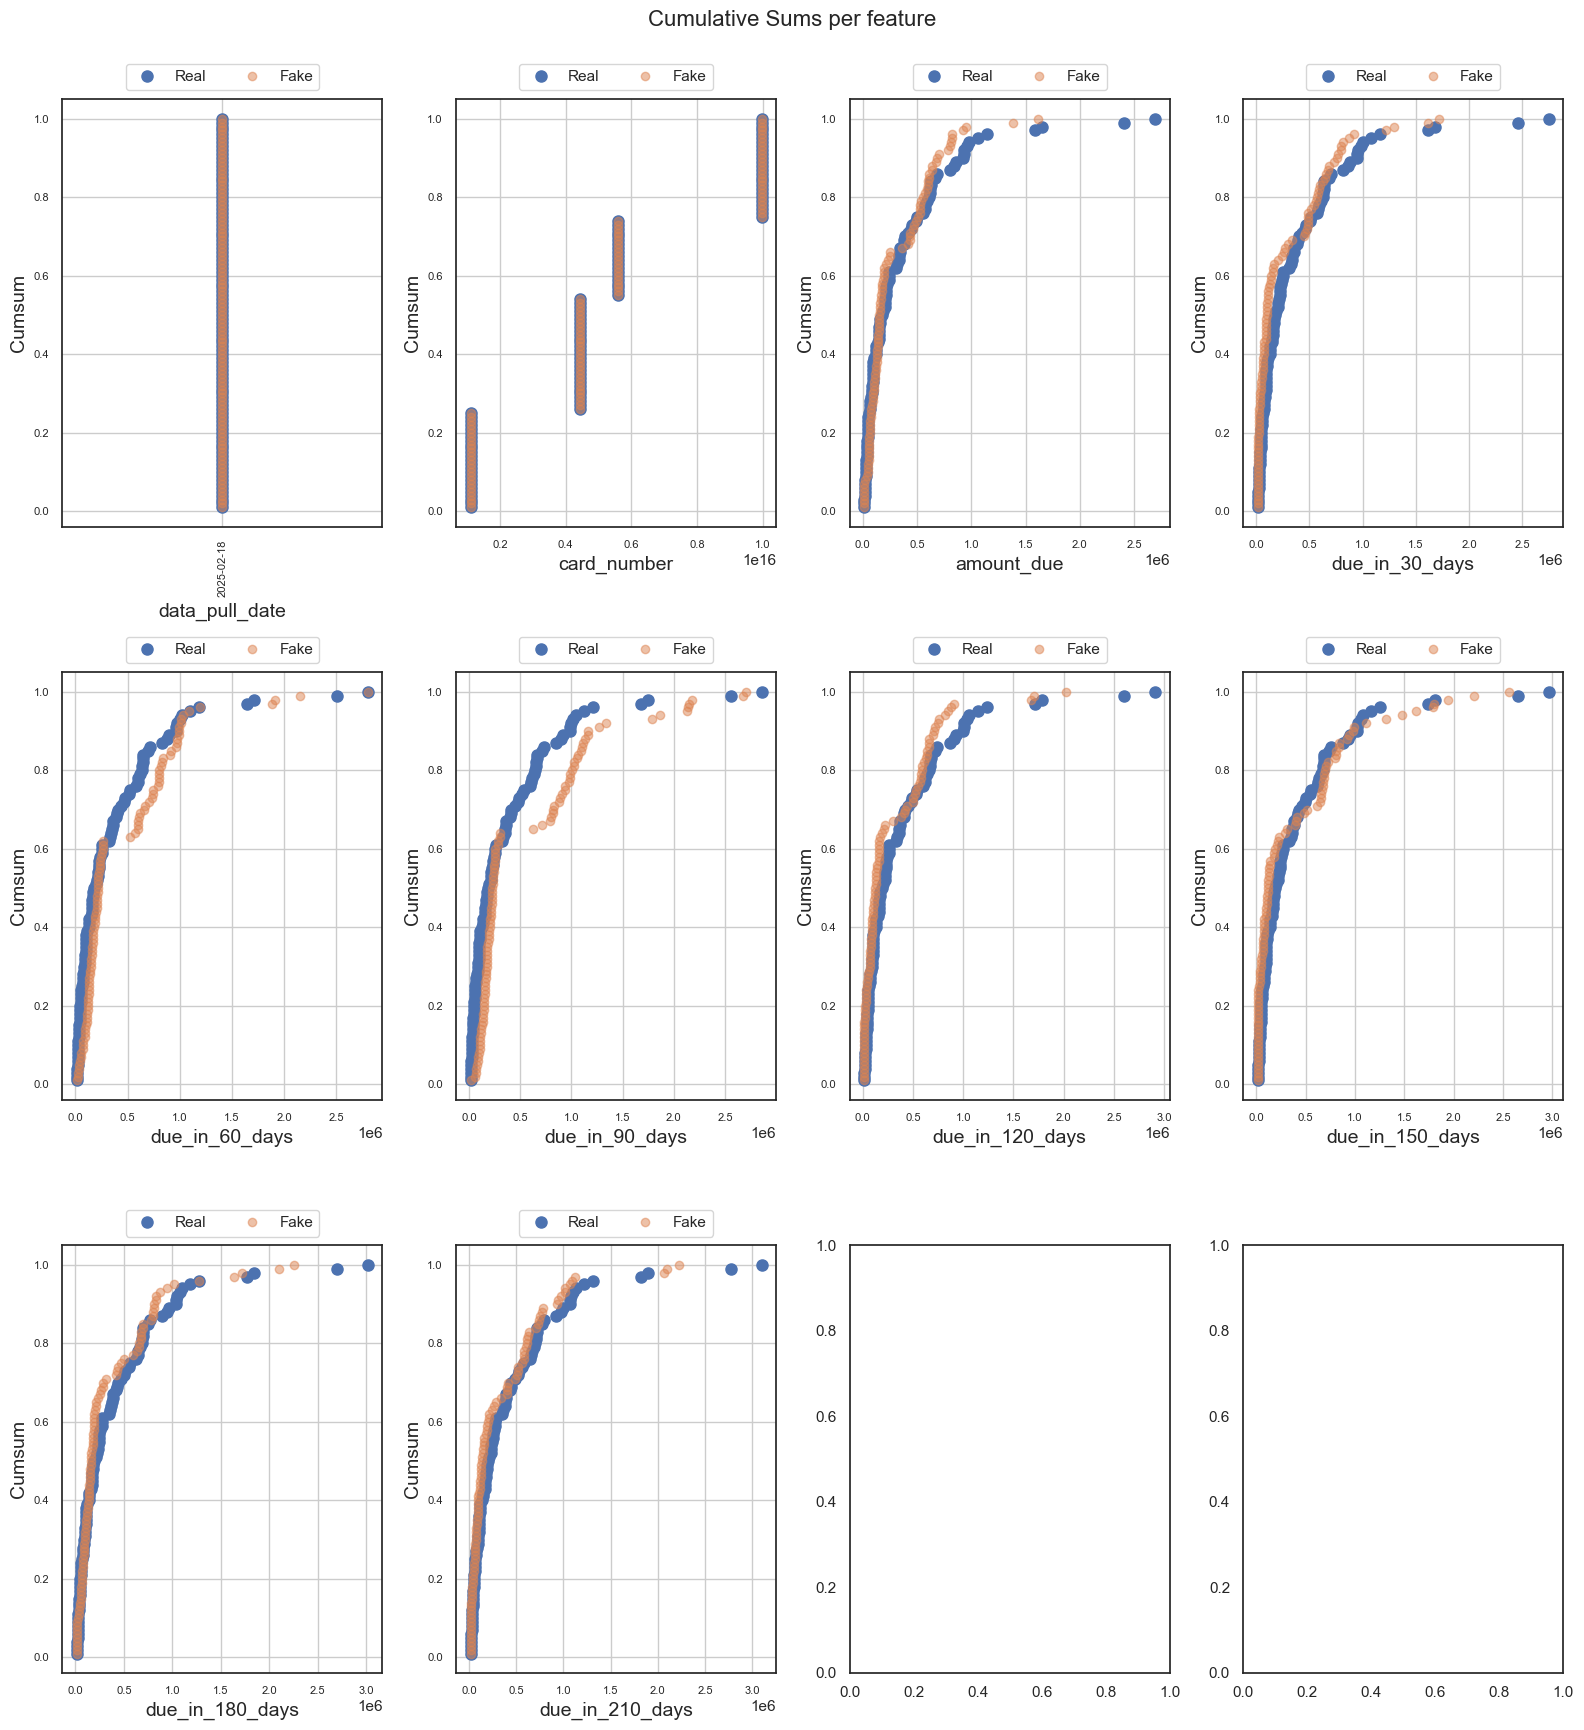

/Users/apple/Documents/Priyesh/VirtualEnvs/Synthetic_Data_Generation_Venvs/growth_hack_gan_venv/lib/python3.9/site-packages/table_evaluator/table_evaluator.py:182: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


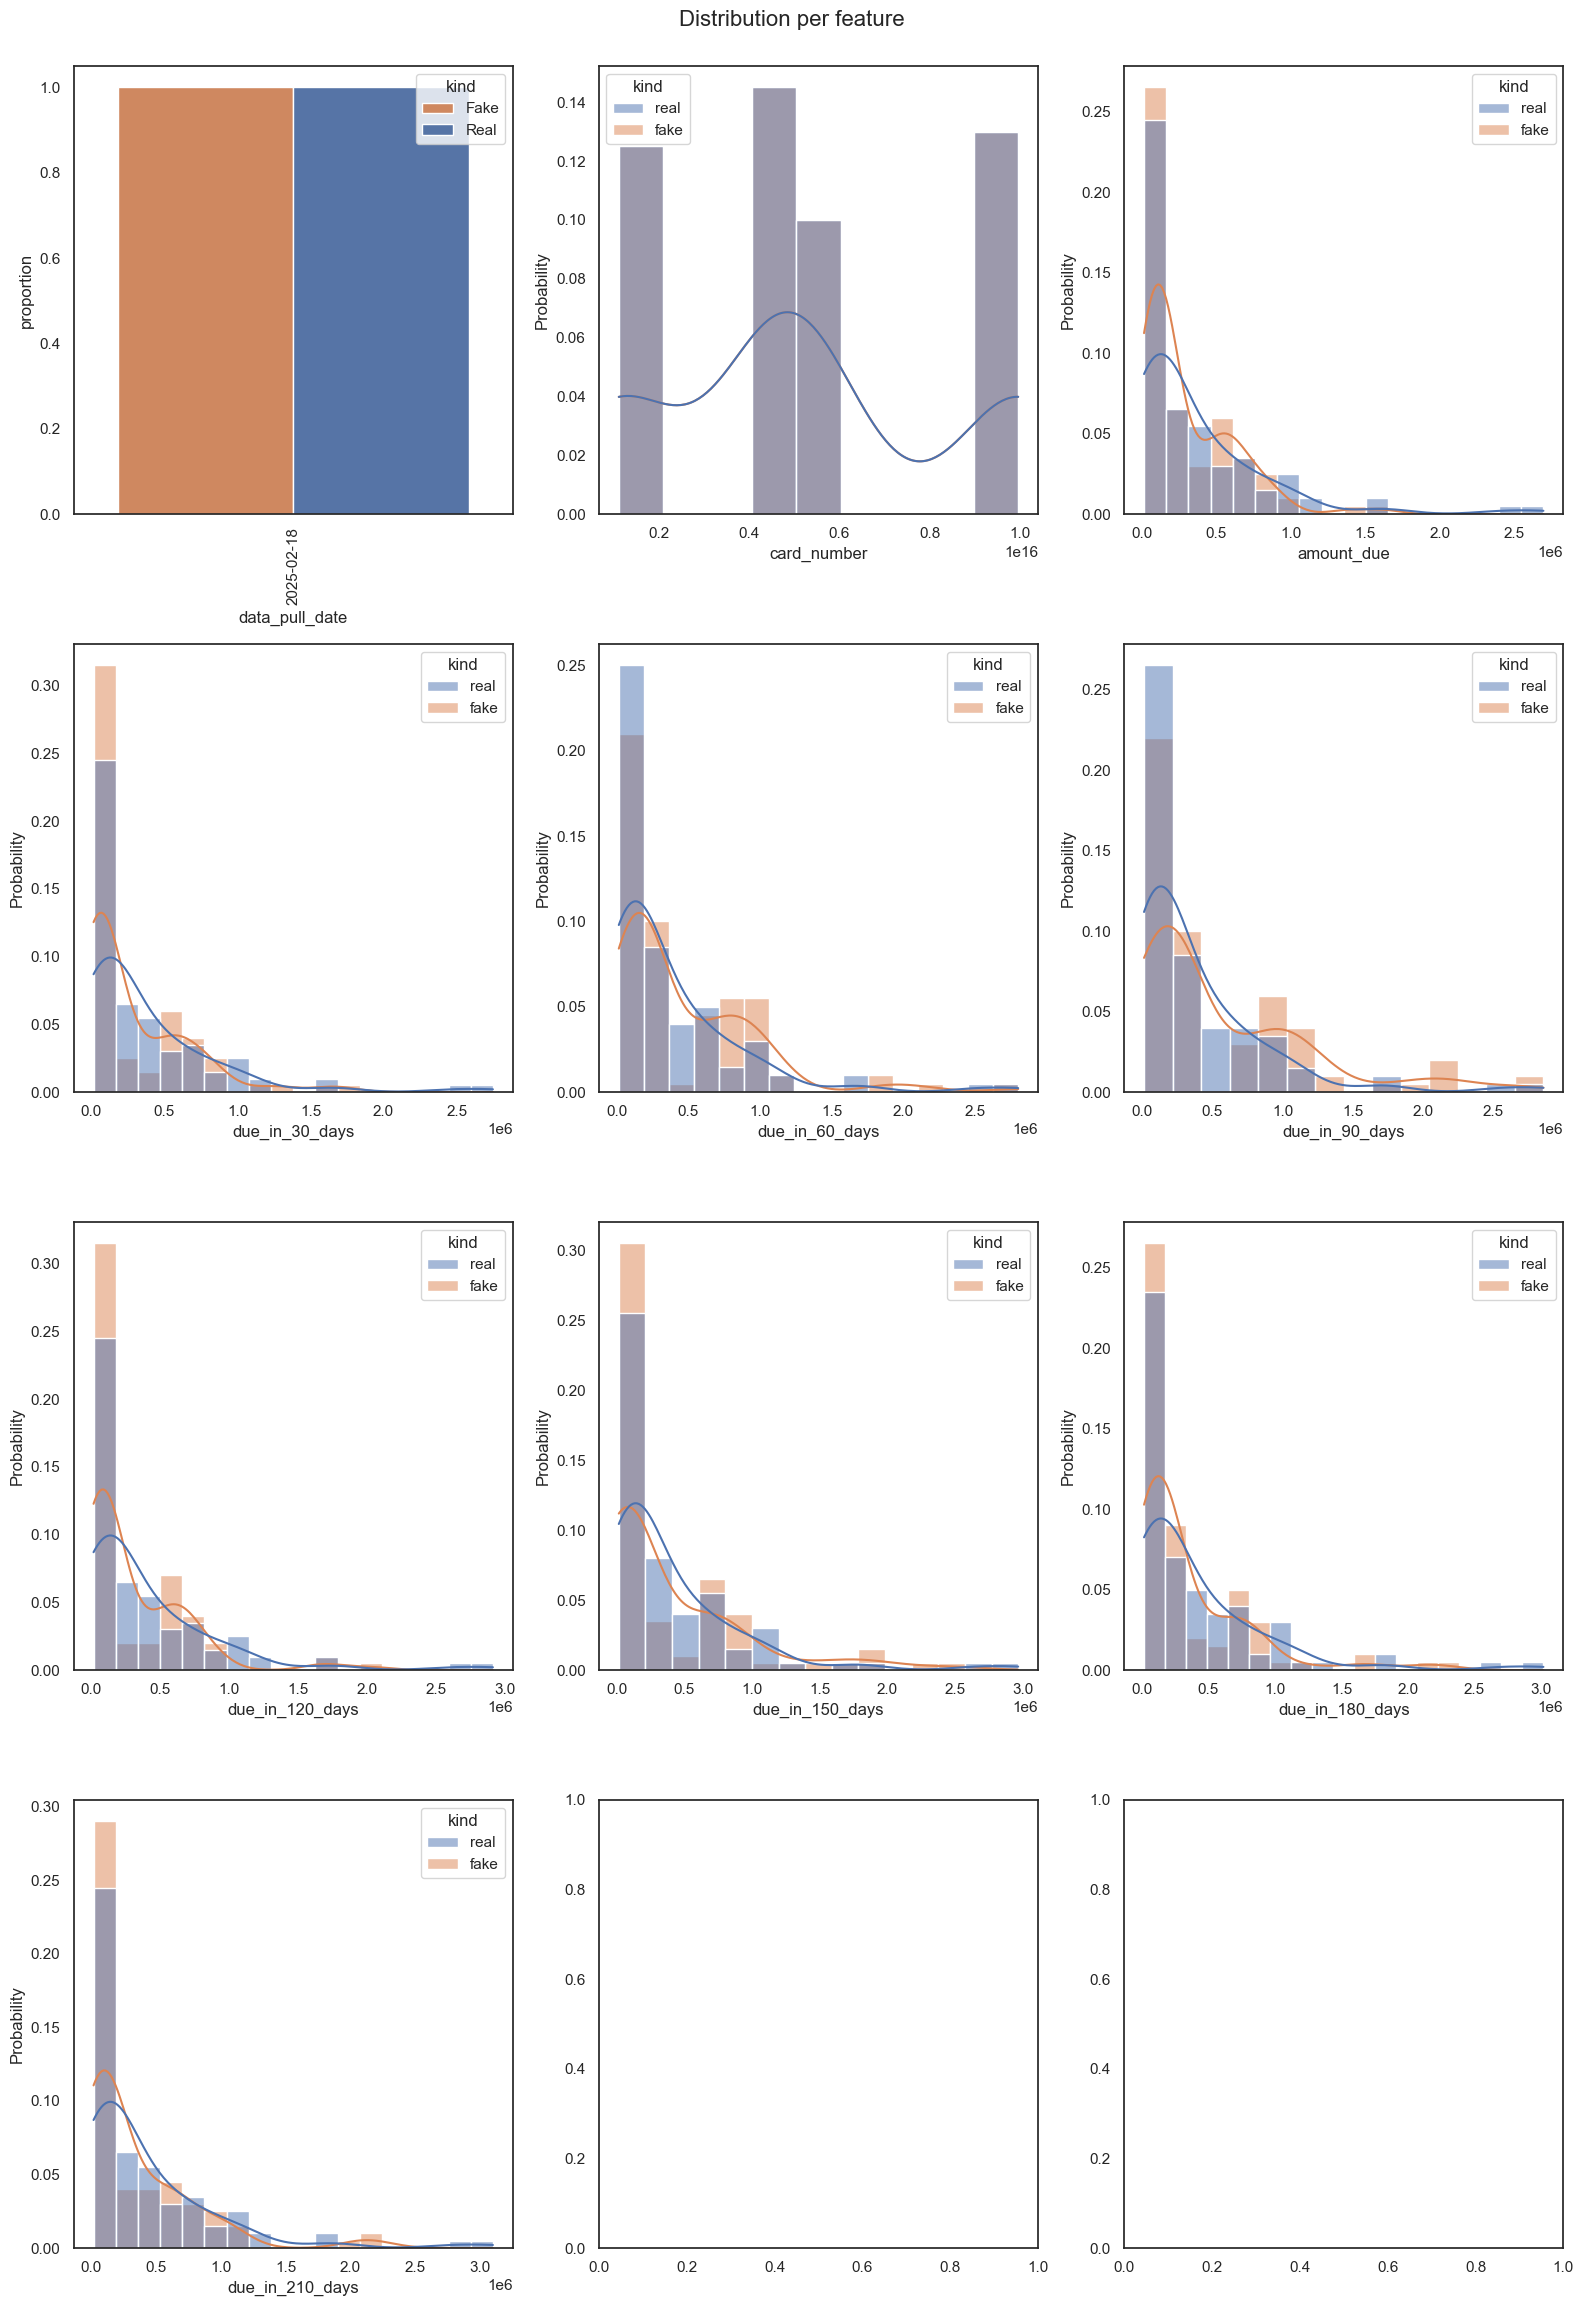

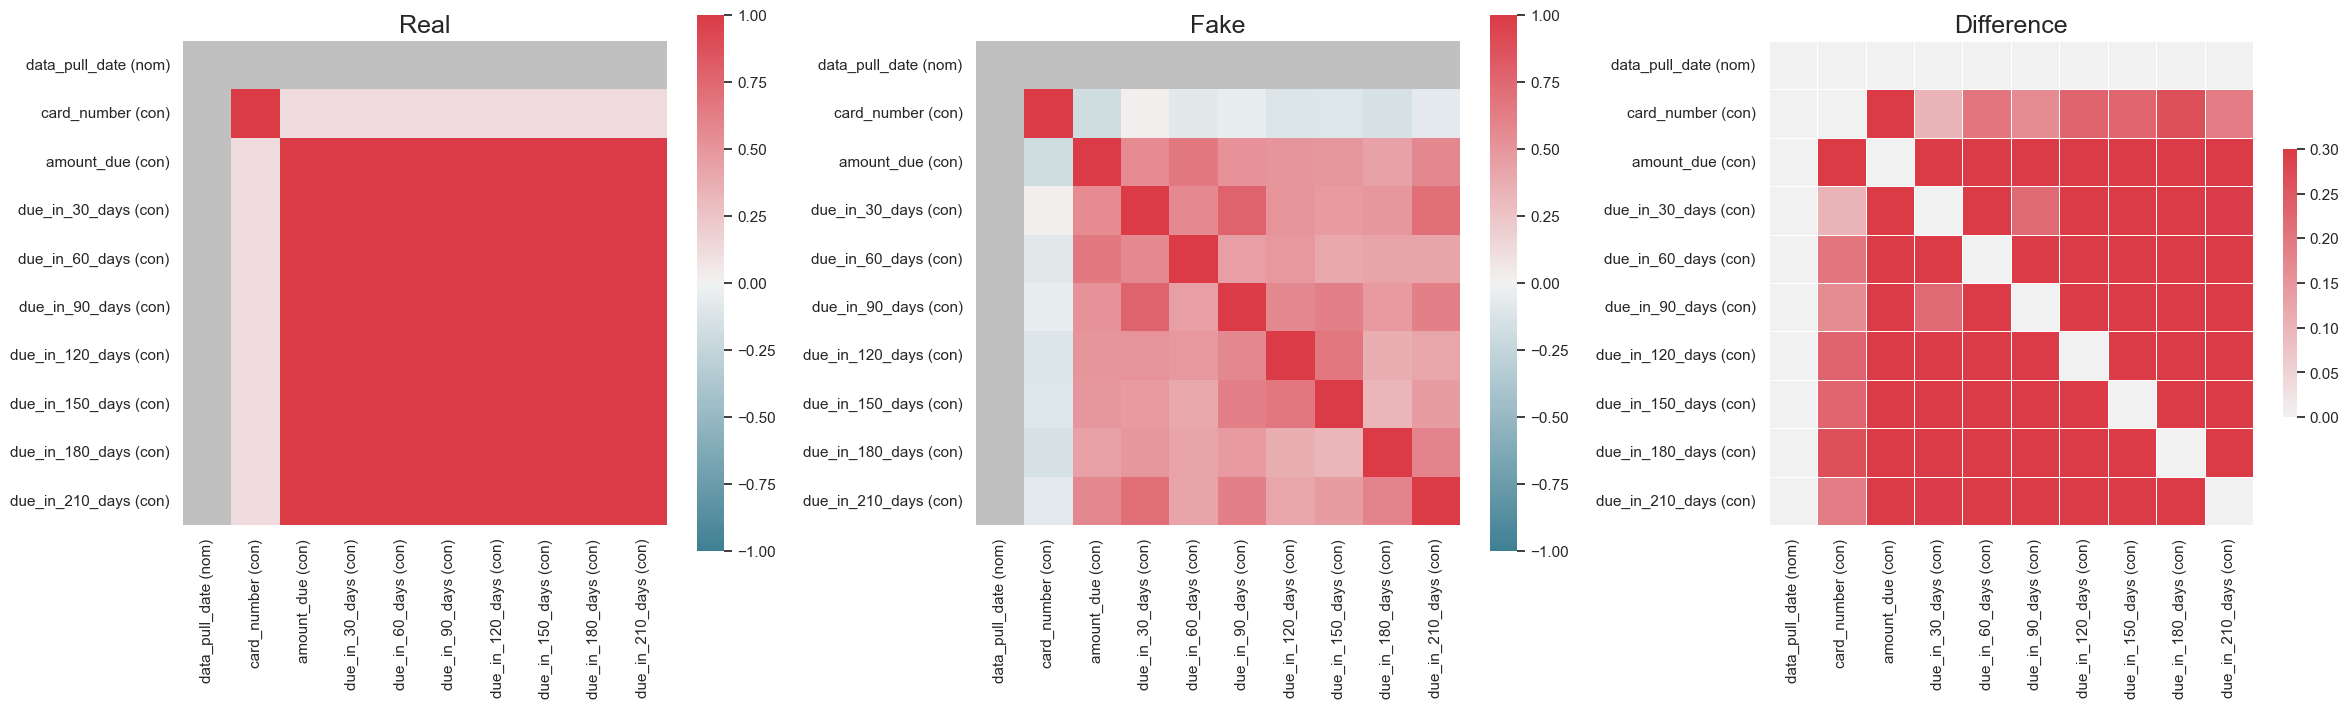

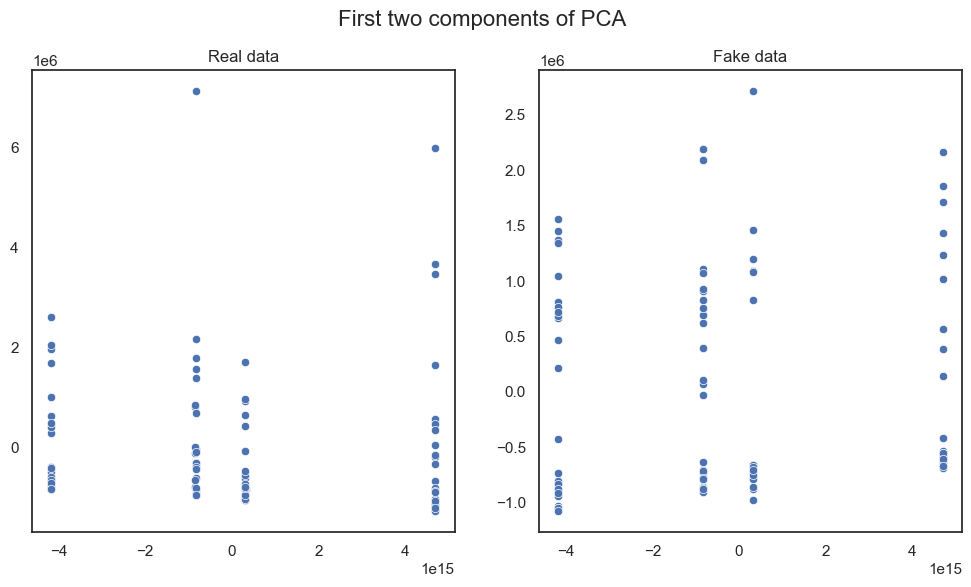

In [12]:
evaluate_synthetic_data(account_fin_info, 
                        account_fin_info_syn, 
                        dataset_name="account fin info")

# Advance Analytics

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp, chi2_contingency
from scipy.spatial.distance import jensenshannon
from sklearn.neighbors import NearestNeighbors

In [ ]:
class EvaluatorDict:
    def __init__(self, real_data, synthetic_data):
        """
        real_data & synthetic_data are dictionaries where:
        - Keys are table names
        - Values are pandas DataFrames
        """
        self.real_data = real_data
        self.synthetic_data = synthetic_data
    
    def detect_column_types(self, df):
        """Detect numerical and categorical columns"""
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def ks_test(self, real_df, synth_df, num_cols):
        """Perform KS test on numerical columns"""
        results = {}
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            results[col] = {'KS Statistic': stat, 'P-Value': p_value}
        return results

    def jensen_shannon_divergence(self, real_df, synth_df, cat_cols):
        """Compute JSD for categorical columns"""
        results = {}
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            # Align distributions
            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            results[col] = {'JSD': jsd}
        return results

    def correlation_comparison(self, real_df, synth_df, num_cols):
        """Compare correlation matrices"""
        real_corr = real_df[num_cols].corr()
        synth_corr = synth_df[num_cols].corr()
        diff = np.abs(real_corr - synth_corr).mean().mean()  # Mean absolute difference
        return {'Correlation Difference': diff}

    def foreign_key_check(self):
        """Ensure foreign key relationships are preserved"""
        results = {}
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results['transactions → customers_info'] = f"{len(missing_customers)} missing references"
            
            if table == "credit_cards":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results['credit_cards → customers_info'] = f"{len(missing_customers)} missing references"

        return results

    def customer_card_ratio(self):
        """Check if customer-card distribution is similar"""
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        return {'Customer-Card Ratio Difference': diff}

    def knn_privacy_check(self, num_cols, k=5):
        """Check privacy leakage using Nearest Neighbors"""
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)
        return {'Nearest Neighbor Distance': avg_distance}

    def evaluate(self):
        """Run all evaluations"""
        results = {}
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results[table] = {
                "KS Test (Numerical)": self.ks_test(real_df, synth_df, num_cols),
                "JSD (Categorical)": self.jensen_shannon_divergence(real_df, synth_df, cat_cols),
                "Correlation Difference": self.correlation_comparison(real_df, synth_df, num_cols)
            }
        
        # Add inter-table checks
        results["Foreign Key Check"] = self.foreign_key_check()
        results["Customer-Card Ratio"] = self.customer_card_ratio()
        results["Privacy Check"] = self.knn_privacy_check(num_cols)

        return results

In [ ]:
class Evaluator:
    def __init__(self, real_data, synthetic_data):
        """
        real_data & synthetic_data are dictionaries where:
        - Keys are table names
        - Values are pandas DataFrames
        """
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        """Detect numerical and categorical columns"""
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def ks_test(self, table_name, real_df, synth_df, num_cols):
        """Perform KS test on numerical columns"""
        results = []
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            results.append(["KS Test", table_name, col, "Numerical", stat, p_value])
        return results

    def jensen_shannon_divergence(self, table_name, real_df, synth_df, cat_cols):
        """Compute JSD for categorical columns"""
        results = []
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            # Align distributions
            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            results.append(["JSD", table_name, col, "Categorical", jsd, None])  # No p-value for JSD
        return results

    def correlation_comparison(self, table_name, real_df, synth_df, num_cols):
        """Compare correlation matrices"""
        real_corr = real_df[num_cols].corr()
        synth_corr = synth_df[num_cols].corr()
        diff = np.abs(real_corr - synth_corr).mean().mean()  # Mean absolute difference
        return [["Correlation Difference", table_name, "All", "Numerical", diff, None]]

    def foreign_key_check(self):
        """Ensure foreign key relationships are preserved"""
        results = []
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None])
            
            if table == "credit_cards":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None])

        return results

    def customer_card_ratio(self):
        """Check if customer-card distribution is similar"""
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        return [["Customer-Card Ratio", "credit_cards", "customer_id", "Categorical", diff, None]]

    def knn_privacy_check(self, num_cols, k=5):
        """Check privacy leakage using Nearest Neighbors"""
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)
        return [["Nearest Neighbor Distance", "All Tables", "All", "Numerical", avg_distance, None]]

    def evaluate(self):
        """Run all evaluations and return as a DataFrame"""
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.ks_test(table, real_df, synth_df, num_cols))
            results.extend(self.jensen_shannon_divergence(table, real_df, synth_df, cat_cols))
            results.extend(self.correlation_comparison(table, real_df, synth_df, num_cols))
        
        # Add inter-table checks
        results.extend(self.foreign_key_check())
        results.extend(self.customer_card_ratio())
        results.extend(self.knn_privacy_check(num_cols))

        # Convert to DataFrame
        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value"])
        return df_results


In [ ]:
class StatsEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def categorize_evaluation(self, metric, value, p_value):
        """Categorizes metric results as Good, Average, or Bad"""
        if metric in ["KS Test", "Transaction Amount Per Customer", "Joint Distribution Check"]:
            if value > 0.2:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "JSD":
            if value > 0.3:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "Foreign Key Check":
            if value > 0.05:
                return "Bad"
            elif value > 0.01:
                return "Average"
            else:
                return "Good"

        elif metric == "Customer-Card Ratio":
            if value > 0.2:
                return "Bad"
            elif value > 0.1:
                return "Average"
            else:
                return "Good"

        elif metric == "Nearest Neighbor Distance":
            if value > 0.5:
                return "Bad"
            elif value > 0.2:
                return "Average"
            else:
                return "Good"

        return "Unknown"

    def ks_test(self, table_name, real_df, synth_df, num_cols):
        results = []
        for col in num_cols:
            stat, p_value = ks_2samp(real_df[col], synth_df[col])
            evaluation = self.categorize_evaluation("KS Test", stat, p_value)
            results.append(["KS Test", table_name, col, "Numerical", stat, p_value, evaluation])
        return results

    def jensen_shannon_divergence(self, table_name, real_df, synth_df, cat_cols):
        results = []
        for col in cat_cols:
            real_dist = real_df[col].value_counts(normalize=True).sort_index()
            synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

            all_categories = set(real_dist.index).union(set(synth_dist.index))
            real_dist = real_dist.reindex(all_categories, fill_value=0)
            synth_dist = synth_dist.reindex(all_categories, fill_value=0)

            jsd = jensenshannon(real_dist, synth_dist)
            evaluation = self.categorize_evaluation("JSD", jsd, None)
            results.append(["JSD", table_name, col, "Categorical", jsd, None, evaluation])
        return results

    def foreign_key_check(self):
        results = []
        for table, df in self.synthetic_data.items():
            if table == "transactions":
                missing_customers = df[~df['customer_id'].isin(self.synthetic_data['customers_info']['customer_id'])]
                eval_result = self.categorize_evaluation("Foreign Key Check", len(missing_customers) / len(df), None)
                results.append(["Foreign Key Check", table, "customer_id", "Categorical", len(missing_customers), None, eval_result])

        return results

    def customer_card_ratio(self):
        real_ratio = self.real_data['credit_cards']['customer_id'].value_counts()
        synth_ratio = self.synthetic_data['credit_cards']['customer_id'].value_counts()
        
        real_mean, synth_mean = real_ratio.mean(), synth_ratio.mean()
        diff = abs(real_mean - synth_mean) / real_mean
        eval_result = self.categorize_evaluation("Customer-Card Ratio", diff, None)
        return [["Customer-Card Ratio", "credit_cards", "customer_id", "Categorical", diff, None, eval_result]]

    def transaction_amount_per_customer(self):
        real_trans = self.real_data['transactions'].groupby('customer_id')['amount'].sum()
        synth_trans = self.synthetic_data['transactions'].groupby('customer_id')['amount'].sum()

        stat, p_value = ks_2samp(real_trans, synth_trans)
        eval_result = self.categorize_evaluation("Transaction Amount Per Customer", stat, p_value)
        return [["Transaction Amount Per Customer", "transactions", "customer_id", "Numerical", stat, p_value, eval_result]]

    def joint_distribution_check(self):
        real_jd = self.real_data['transactions'][['customer_id', 'amount']]
        synth_jd = self.synthetic_data['transactions'][['customer_id', 'amount']]

        real_dist = real_jd.groupby('customer_id')['amount'].mean()
        synth_dist = synth_jd.groupby('customer_id')['amount'].mean()

        stat, p_value = ks_2samp(real_dist, synth_dist)
        eval_result = self.categorize_evaluation("Joint Distribution Check", stat, p_value)
        return [["Joint Distribution Check", "transactions", "customer_id-amount", "Numerical", stat, p_value, eval_result]]

    def knn_privacy_check(self, num_cols, k=5):
        real_values = np.vstack([self.real_data[table][num_cols].values for table in self.real_data])
        synth_values = np.vstack([self.synthetic_data[table][num_cols].values for table in self.synthetic_data])

        knn = NearestNeighbors(n_neighbors=k)
        knn.fit(real_values)
        distances, _ = knn.kneighbors(synth_values)
        avg_distance = np.mean(distances)

        eval_result = self.categorize_evaluation("Nearest Neighbor Distance", avg_distance, None)
        return [["Nearest Neighbor Distance", "All Tables", "All", "Numerical", avg_distance, None, eval_result]]

    def evaluate(self):
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.ks_test(table, real_df, synth_df, num_cols))
            results.extend(self.jensen_shannon_divergence(table, real_df, synth_df, cat_cols))

        results.extend(self.foreign_key_check())
        results.extend(self.customer_card_ratio())
        results.extend(self.transaction_amount_per_customer())
        results.extend(self.joint_distribution_check())
        results.extend(self.knn_privacy_check(num_cols))

        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value", "Evaluation"])
        return df_results


![Screenshot 2025-02-11 at 9.29.20 AM.png](<attachment:Screenshot 2025-02-11 at 9.29.20 AM.png>)
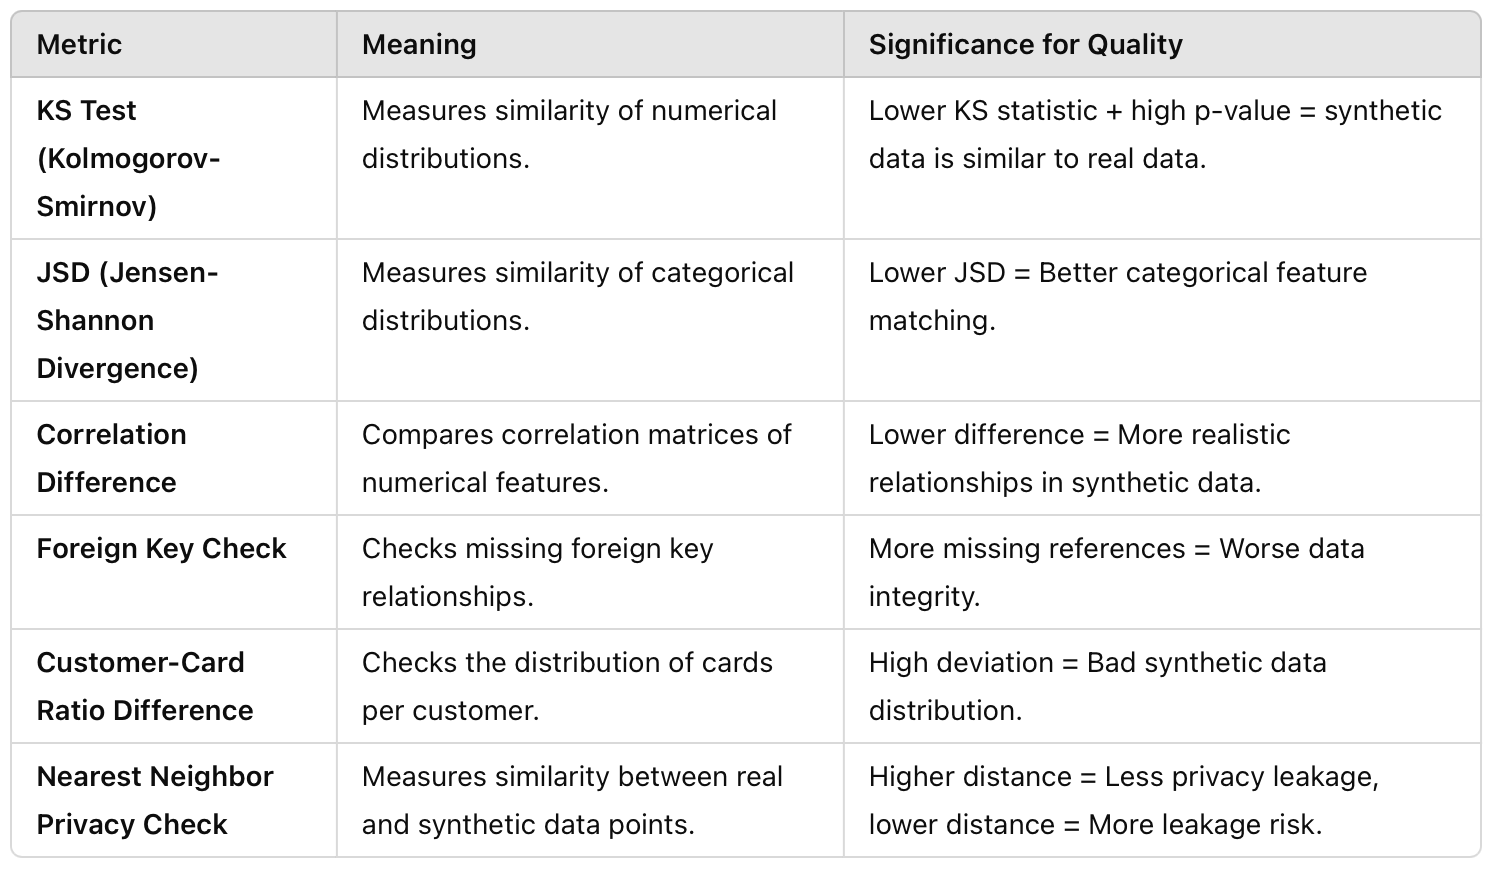

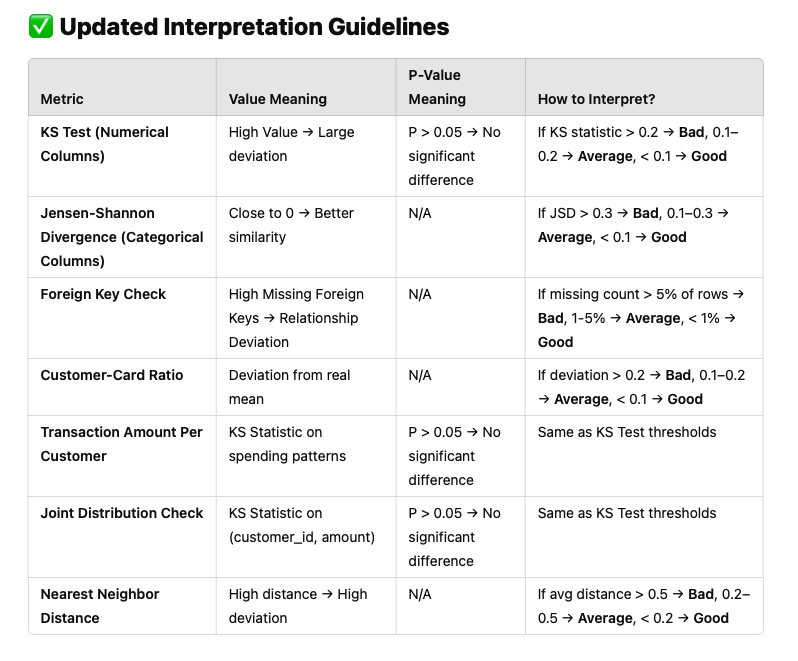

In [ ]:
evaluator = StatsEvaluator(tables, synthetic_data)
evaluation_results = evaluator.evaluate()
evaluation_results

## Drift Evaluator

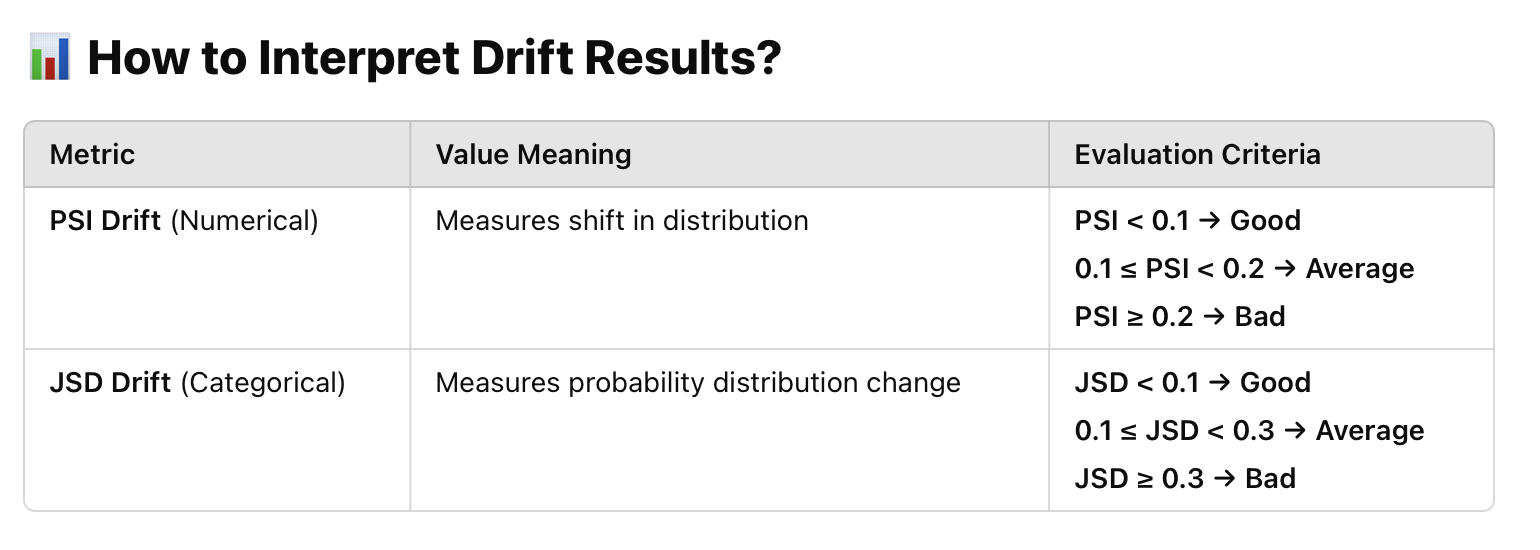

In [ ]:
class DriftEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def detect_column_types(self, df):
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
        return numerical_cols, categorical_cols

    def population_stability_index(self, table_name, real_df, synth_df, num_cols):
        results = []
        for col in num_cols:
            real_bins = np.histogram(real_df[col], bins=10)[0] / len(real_df)
            synth_bins = np.histogram(synth_df[col], bins=10)[0] / len(synth_df)
            
            psi_values = np.where(real_bins > 0, (real_bins - synth_bins) * np.log(real_bins / synth_bins), 0)
            psi = np.sum(psi_values)

            evaluation = "Good" if psi < 0.1 else "Average" if psi < 0.2 else "Bad"
            results.append(["PSI Drift", table_name, col, "Numerical", psi, None, evaluation])
        return results

    def drift_detection(self):
        results = []
        for table in self.real_data.keys():
            real_df, synth_df = self.real_data[table], self.synthetic_data[table]
            num_cols, cat_cols = self.detect_column_types(real_df)

            results.extend(self.population_stability_index(table, real_df, synth_df, num_cols))

            for col in cat_cols:
                real_dist = real_df[col].value_counts(normalize=True).sort_index()
                synth_dist = synth_df[col].value_counts(normalize=True).sort_index()

                all_categories = set(real_dist.index).union(set(synth_dist.index))
                real_dist = real_dist.reindex(all_categories, fill_value=0)
                synth_dist = synth_dist.reindex(all_categories, fill_value=0)

                jsd = jensenshannon(real_dist, synth_dist)
                evaluation = "Good" if jsd < 0.1 else "Average" if jsd < 0.3 else "Bad"
                results.append(["JSD Drift", table, col, "Categorical", jsd, None, evaluation])

        return results

    def evaluate(self):
        results = []
        results.extend(self.drift_detection())

        df_results = pd.DataFrame(results, columns=["Metric", "Table Name", "Column Name", "Column DType", "Value", "P-Value", "Evaluation"])
        return df_results


In [ ]:
evaluator = DriftEvaluator(tables, synthetic_data)
evaluation_results = evaluator.evaluate()
evaluation_results

## Drift analysis

In [ ]:
import pandas as pd
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, DataQualityPreset

class EvidentlyEvaluator:
    def __init__(self, real_data, synthetic_data):
        self.real_data = real_data
        self.synthetic_data = synthetic_data

    def evaluate_table(self, table_name):
        real_df, synth_df = self.real_data[table_name], self.synthetic_data[table_name]

        drift_report = Report(metrics=[DataDriftPreset()])
        drift_report.run(reference_data=real_df, current_data=synth_df)

        quality_report = Report(metrics=[DataQualityPreset()])
        quality_report.run(reference_data=real_df, current_data=synth_df)

        return drift_report, quality_report

    def evaluate_all(self):
        results = {}
        for table in self.real_data.keys():
            drift_report, quality_report = self.evaluate_table(table)
            results[table] = {"Drift Report": drift_report, "Quality Report": quality_report}
        return results